In [2]:
# import all libraries and dependencies for dataframe
from numpy import *
from pandas import *
from scipy import *
from matplotlib.pyplot import *
from seaborn import *
from statsmodels.api import *
from statsmodels.formula.api import *
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
# Don't need to type show() command further if you do %matplotlib inline
%matplotlib inline
from statsmodels.tsa.api import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from datetime import datetime, timedelta

In [3]:
# import all libraries and dependencies for data visualization
rcParams['figure.figsize'] = [10,10]
set(style='darkgrid')
rcParams["scatter.edgecolors"]='black'
from matplotlib.ticker import *
#Set Option for Displaying All Columns of a Pandas DataFrame
#Set Option for Displaying All Rows of a Pandas DataFrame
set_option('display.max_columns',None)
set_option('display.max_rows',None)

# Checkout the Data

In [4]:
# sep=',' to align the DataFrame properly
# header='infer' which Row should be taken as header, default behaviour is to infer the Column names as header
# header=0 means 0th Row index should be taken as header
# na_values=None or na_values="String" or na_values=["String1","String2"] if you wanna specify any "String" as NaN
# keep_default_na=True by default ‘#N/A’,‘#N/A N/A’,‘#NA’,‘-1.#IND’,‘-1.#QNAN’,‘-NaN’,‘-nan’,‘1.#IND’,‘1.#QNAN’,‘N/A’,‘NA’,‘NULL’,‘NaN’,‘n/a’,‘nan’,‘null’ will be treated as NaN
# na_filter=True blank cells will be treated as NaN
# index_col=None works just like set_index() & you just need to type the column name to be set as index column

IRIS=read_csv("DataFile/IRIS.csv",sep=',',header='infer',na_values=None,keep_default_na=True,na_filter=True,index_col=None) #Write the file path & name inside ("")
IRIS

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            4.3           3.0            1.1           0.1   
14    15            5.8           4.0            1.2           0.2   
15    16            5.7           4.4            1.5           0.4   
16    17            5.4           3.9            1.3           0.4   
17    18            5.1           3.5            1.4           0.3   
18    19            5.7           3.8            1.7           0.3   
19    20            5.1           3.8            1.5           0.3   
20    21            5.4           3.4            1.7           0.2   
21    22            5.1           3.7            1.5           0.4   
22    23            4.6           3.6            1.0           0.2   
23    24            5.1           3.3            1.7           0.5   
24    25            4.8           3.4            1.9           0.2   
25    26            5.0           3.0            1.6           0.2   
26    27            5.0           3.4            1.6           0.4   
27    28            5.2           3.5            1.5           0.2   
28    29            5.2           3.4            1.4           0.2   
29    30            4.7           3.2            1.6           0.2   
30    31            4.8           3.1            1.6           0.2   
31    32            5.4           3.4            1.5           0.4   
32    33            5.2           4.1            1.5           0.1   
33    34            5.5           4.2            1.4           0.2   
34    35            4.9           3.1            1.5           0.1   
35    36            5.0           3.2            1.2           0.2   
36    37            5.5           3.5            1.3           0.2   
37    38            4.9           3.1            1.5           0.1   
38    39            4.4           3.0            1.3           0.2   
39    40            5.1           3.4            1.5           0.2   
40    41            5.0           3.5            1.3           0.3   
41    42            4.5           2.3            1.3           0.3   
42    43            4.4           3.2            1.3           0.2   
43    44            5.0           3.5            1.6           0.6   
44    45            5.1           3.8            1.9           0.4   
45    46            4.8           3.0            1.4           0.3   
46    47            5.1           3.8            1.6           0.2   
47    48            4.6           3.2            1.4           0.2   
48    49            5.3           3.7            1.5           0.2   
49    50            5.0           3.3            1.4           0.2   
50    51            7.0           3.2            4.7           1.4   
51    52            6.4           3.2            4.5           1.5   
52    53            6.9           3.1            4.9           1.5   
53    54            5.5           2.3            4.0           1.3   
54    55            6.5           2.8            4.6           1.5   
55    56            5.7           2.8            4.5           1.3   
56    57        

In [5]:
IRIS['Species'] = IRIS['Species'].astype('category')

In [6]:
# It shows type of the DataFrame
# Shows no of Rows & Cols
# Shows all Col names
# Shows total no of NaN values for each Column
# Shows data type of each Columns
IRIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.2 KB


In [7]:
# Shows data type of each column
# Object column generally contains "string" & arbitrary python objects like List, Dictionary, Tuple etc
IRIS.dtypes

Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [8]:
# Total no of NaN Values in each column
# Shows which col has how many no of NaN values in total
# No Column has NaN value
IRIS.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# examine the duplicate rows (ignoring the first occurrence)
IRIS.loc[IRIS.duplicated(keep='first'), :]

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []

In [10]:
# drop the duplicate rows (inplace=False by default)
# 101 Rows have been Dropped out of 1000 Rows
IRIS.drop_duplicates(keep='first', inplace=True)
IRIS.shape

(150, 6)

In [11]:
# Reset the Index Sequence after Drop the Duplicate Rows
IRIS=IRIS.reset_index(drop=True)
IRIS

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            4.3           3.0            1.1           0.1   
14    15            5.8           4.0            1.2           0.2   
15    16            5.7           4.4            1.5           0.4   
16    17            5.4           3.9            1.3           0.4   
17    18            5.1           3.5            1.4           0.3   
18    19            5.7           3.8            1.7           0.3   
19    20            5.1           3.8            1.5           0.3   
20    21            5.4           3.4            1.7           0.2   
21    22            5.1           3.7            1.5           0.4   
22    23            4.6           3.6            1.0           0.2   
23    24            5.1           3.3            1.7           0.5   
24    25            4.8           3.4            1.9           0.2   
25    26            5.0           3.0            1.6           0.2   
26    27            5.0           3.4            1.6           0.4   
27    28            5.2           3.5            1.5           0.2   
28    29            5.2           3.4            1.4           0.2   
29    30            4.7           3.2            1.6           0.2   
30    31            4.8           3.1            1.6           0.2   
31    32            5.4           3.4            1.5           0.4   
32    33            5.2           4.1            1.5           0.1   
33    34            5.5           4.2            1.4           0.2   
34    35            4.9           3.1            1.5           0.1   
35    36            5.0           3.2            1.2           0.2   
36    37            5.5           3.5            1.3           0.2   
37    38            4.9           3.1            1.5           0.1   
38    39            4.4           3.0            1.3           0.2   
39    40            5.1           3.4            1.5           0.2   
40    41            5.0           3.5            1.3           0.3   
41    42            4.5           2.3            1.3           0.3   
42    43            4.4           3.2            1.3           0.2   
43    44            5.0           3.5            1.6           0.6   
44    45            5.1           3.8            1.9           0.4   
45    46            4.8           3.0            1.4           0.3   
46    47            5.1           3.8            1.6           0.2   
47    48            4.6           3.2            1.4           0.2   
48    49            5.3           3.7            1.5           0.2   
49    50            5.0           3.3            1.4           0.2   
50    51            7.0           3.2            4.7           1.4   
51    52            6.4           3.2            4.5           1.5   
52    53            6.9           3.1            4.9           1.5   
53    54            5.5           2.3            4.0           1.3   
54    55            6.5           2.8            4.6           1.5   
55    56            5.7           2.8            4.5           1.3   
56    57        

In [12]:
IRIS.describe() #It prints the statistics of the data file
                 #This shows the statistical informations of numerical cols only
                 #Only numeric cols have been taken into account

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [13]:
IRIS.drop(columns="Id",axis=1,inplace=True) #Remove the Address col from UsaHouse data
IRIS.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
# Dont Count the NaN Values
# Count the Frequency of Each Factor of Survived Column
# Survived is Imbalanced Categorical Target Column
# species categories are excellent & well balanced
IRIS.Species.value_counts(dropna=True)

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Normality Test of all Numeric continuous Features

In [15]:
#Normality test/Distribution test of SepalLengthCm Numeric column in Training Data/variables
from scipy.stats import shapiro
stat,pvalue = shapiro(IRIS['SepalLengthCm'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): SepalLengthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): SepalLengthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
from scipy.stats import normaltest
stat,pvalue = normaltest(IRIS['SepalLengthCm'],nan_policy='omit') #nan_policy='omit' excludes NaN values from the Calculation
if pvalue >= 0.05:
    print("Null Hypothesis (H0): SepalLengthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): SepalLengthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
from scipy.stats import anderson
Result=anderson(IRIS['SepalLengthCm'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, SepalLengthCm is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, SepalLengthCm is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): SepalLengthCm is not Normally Distributed
Confidence Level : 98.9820159971714 %
Statistics=0.976, p=0.010
Null Hypothesis (H0): SepalLengthCm is Normally distributed
Confidence Level : 94.31757505893269 %
Statistics=5.736, p=0.057
Alternate Hypothesis (H1): '15.000 : 0.562, SepalLengthCm is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.640, SepalLengthCm is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.767, SepalLengthCm is not Normally Distributed
Null Hypothesis (H0): '2.500 : 0.895, SepalLengthCm is Normally distributed
Null Hypothesis (H0): '1.000 : 1.065, SepalLengthCm is Normally distributed
Confidence Level : 11.080051398658952 %
Statistic: 0.889


In [16]:
#Normality test/Distribution test of SepalWidthCm Numeric column in Training Data/variables
stat,pvalue = shapiro(IRIS['SepalWidthCm'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): SepalWidthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): SepalWidthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(IRIS['SepalWidthCm'],nan_policy='omit') #nan_policy='omit' excludes NaN values from the Calculation
if pvalue >= 0.05:
    print("Null Hypothesis (H0): SepalWidthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): SepalWidthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(IRIS['SepalWidthCm'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, SepalWidthCm is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, SepalWidthCm is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Null Hypothesis (H0): SepalWidthCm is Normally distributed
Confidence Level : 92.48165637254715 %
Statistics=0.984, p=0.075
Null Hypothesis (H0): SepalWidthCm is Normally distributed
Confidence Level : 83.27592821276286 %
Statistics=3.577, p=0.167
Alternate Hypothesis (H1): '15.000 : 0.562, SepalWidthCm is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.640, SepalWidthCm is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.767, SepalWidthCm is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.895, SepalWidthCm is not Normally Distributed
Null Hypothesis (H0): '1.000 : 1.065, SepalWidthCm is Normally distributed
Confidence Level : 3.433521983782839 %
Statistic: 0.966


In [17]:
#Normality test/Distribution test of PetalLengthCm Numeric column in Training Data/variables
stat,pvalue = shapiro(IRIS['PetalLengthCm'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): PetalLengthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): PetalLengthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(IRIS['PetalLengthCm'],nan_policy='omit') #nan_policy='omit' excludes NaN values from the Calculation
if pvalue >= 0.05:
    print("Null Hypothesis (H0): PetalLengthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): PetalLengthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(IRIS['PetalLengthCm'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, PetalLengthCm is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, PetalLengthCm is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): PetalLengthCm is not Normally Distributed
Confidence Level : 99.99999992455018 %
Statistics=0.876, p=0.000
Alternate Hypothesis (H1): PetalLengthCm is not Normally Distributed
Confidence Level : 100.0 %
Statistics=221.332, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.562, PetalLengthCm is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.640, PetalLengthCm is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.767, PetalLengthCm is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.895, PetalLengthCm is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.065, PetalLengthCm is not Normally Distributed
Confidence Level : -667.2882599382774 %
Statistic: 7.673


In [18]:
#Normality test/Distribution test of PetalWidthCm Numeric column in Training Data/variables
stat,pvalue = shapiro(IRIS['PetalWidthCm'])
if pvalue >= 0.05:
    print("Null Hypothesis (H0): PetalWidthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): PetalWidthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*D'Agostino's Skewness/K^2 test(normality)
stat,pvalue = normaltest(IRIS['PetalWidthCm'],nan_policy='omit') #nan_policy='omit' excludes NaN values from the Calculation
if pvalue >= 0.05:
    print("Null Hypothesis (H0): PetalWidthCm is Normally distributed")
else:
    print("Alternate Hypothesis (H1): PetalWidthCm is not Normally Distributed")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#*Anderson Darling Test(normality)
Result=anderson(IRIS['PetalWidthCm'])
p=0
for i in range(len(Result.critical_values)):
    SL, CV = Result.significance_level[i], Result.critical_values[i]
    if Result.statistic < Result.critical_values[i]:
        print("Null Hypothesis (H0): '%.3f : %.3f, PetalWidthCm is Normally distributed"%(SL,CV))
    else:
        print("Alternate Hypothesis (H1): '%.3f : %.3f, PetalWidthCm is not Normally Distributed"%(SL,CV))
print("Confidence Level : {} %".format(((1- Result.statistic)*100)))
print('Statistic: %.3f' % Result.statistic)

Alternate Hypothesis (H1): PetalWidthCm is not Normally Distributed
Confidence Level : 99.9999981353321 %
Statistics=0.903, p=0.000
Alternate Hypothesis (H1): PetalWidthCm is not Normally Distributed
Confidence Level : 100.0 %
Statistics=136.777, p=0.000
Alternate Hypothesis (H1): '15.000 : 0.562, PetalWidthCm is not Normally Distributed
Alternate Hypothesis (H1): '10.000 : 0.640, PetalWidthCm is not Normally Distributed
Alternate Hypothesis (H1): '5.000 : 0.767, PetalWidthCm is not Normally Distributed
Alternate Hypothesis (H1): '2.500 : 0.895, PetalWidthCm is not Normally Distributed
Alternate Hypothesis (H1): '1.000 : 1.065, PetalWidthCm is not Normally Distributed
Confidence Level : -406.2814212935109 %
Statistic: 5.063


# Exploratory Data Analysis (EDA)

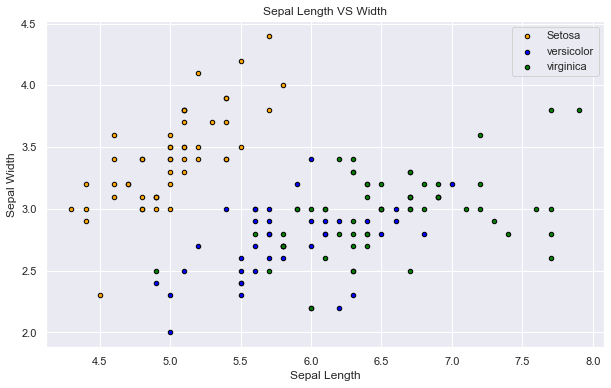

In [19]:
fig = IRIS[IRIS.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
IRIS[IRIS.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
IRIS[IRIS.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=gcf()
fig.set_size_inches(10,6)
show()

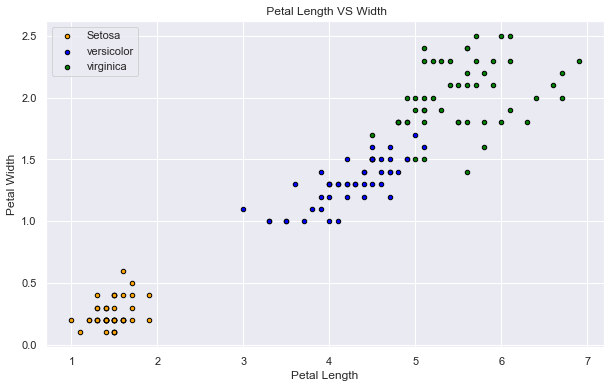

In [20]:
fig = IRIS[IRIS.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
IRIS[IRIS.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
IRIS[IRIS.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica',ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=gcf()
fig.set_size_inches(10,6)
show()

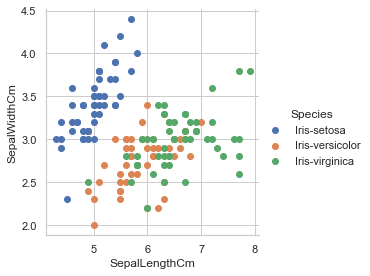

In [21]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
set_style("whitegrid");
FacetGrid(IRIS, hue="Species", size=4) \
   .map(scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

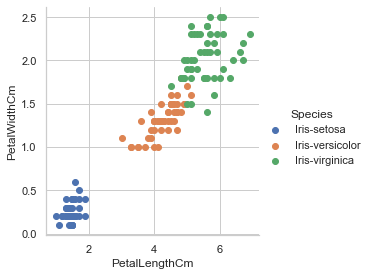

In [22]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
set_style("whitegrid");
FacetGrid(IRIS, hue="Species", size=4) \
   .map(scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();
show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

In [23]:
# 3D scatter plot with Plotly Express
from plotly.express import scatter_3d
fig = scatter_3d(IRIS, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
              color='Species')
fig.show()

In [24]:
fig = scatter_3d(IRIS, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm',
              color='Species')
fig.show()

In [25]:
fig = scatter_3d(IRIS, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm',
                    color='PetalWidthCm', symbol='Species')
fig.show()

In [26]:
fig = scatter_3d(IRIS, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm',
              color='PetalLengthCm', size='PetalLengthCm', size_max=18,
              symbol='Species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [27]:
fig = scatter_3d(IRIS, x='PetalLengthCm', y='PetalWidthCm', z='SepalWidthCm',
              color='SepalLengthCm', size='SepalLengthCm', size_max=18,
              symbol='Species', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

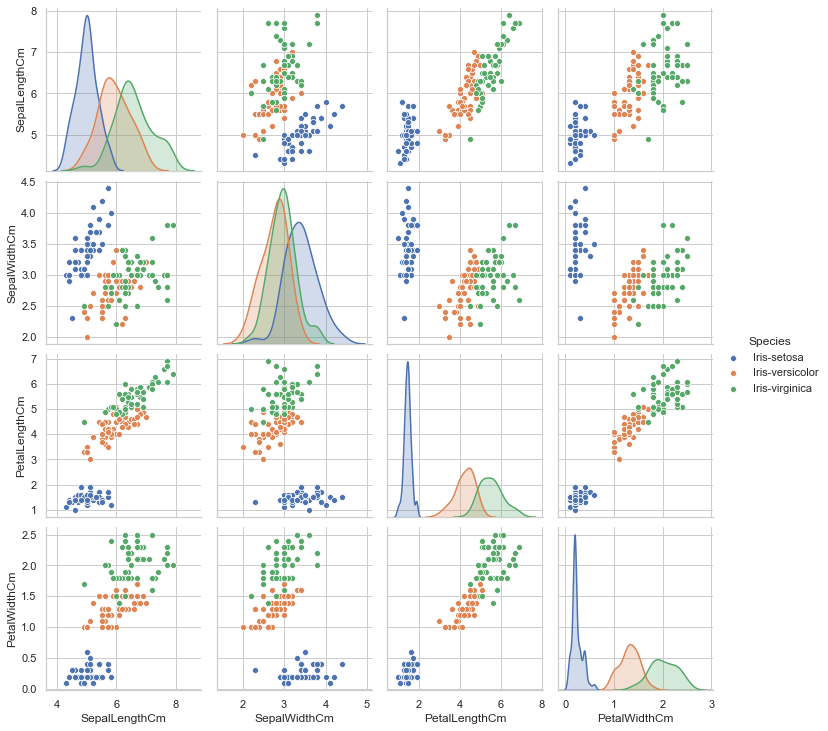

In [28]:
pairplot(IRIS,hue='Species');
show()

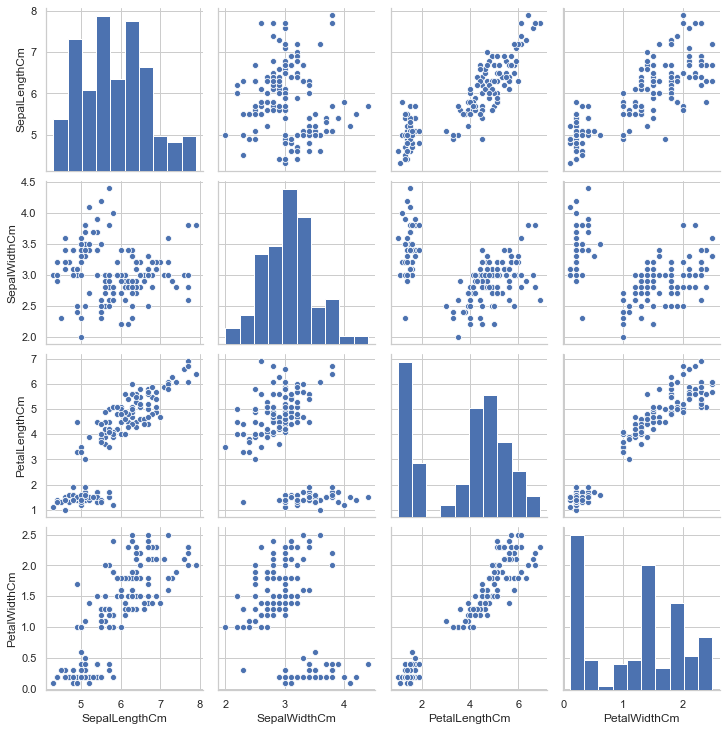

In [29]:
# See the pair plot of IRIS DataFrame
# To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.
# This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame.
# By default, it also draws the univariate distribution of each variable on the diagonal Axes:
pairplot(IRIS)

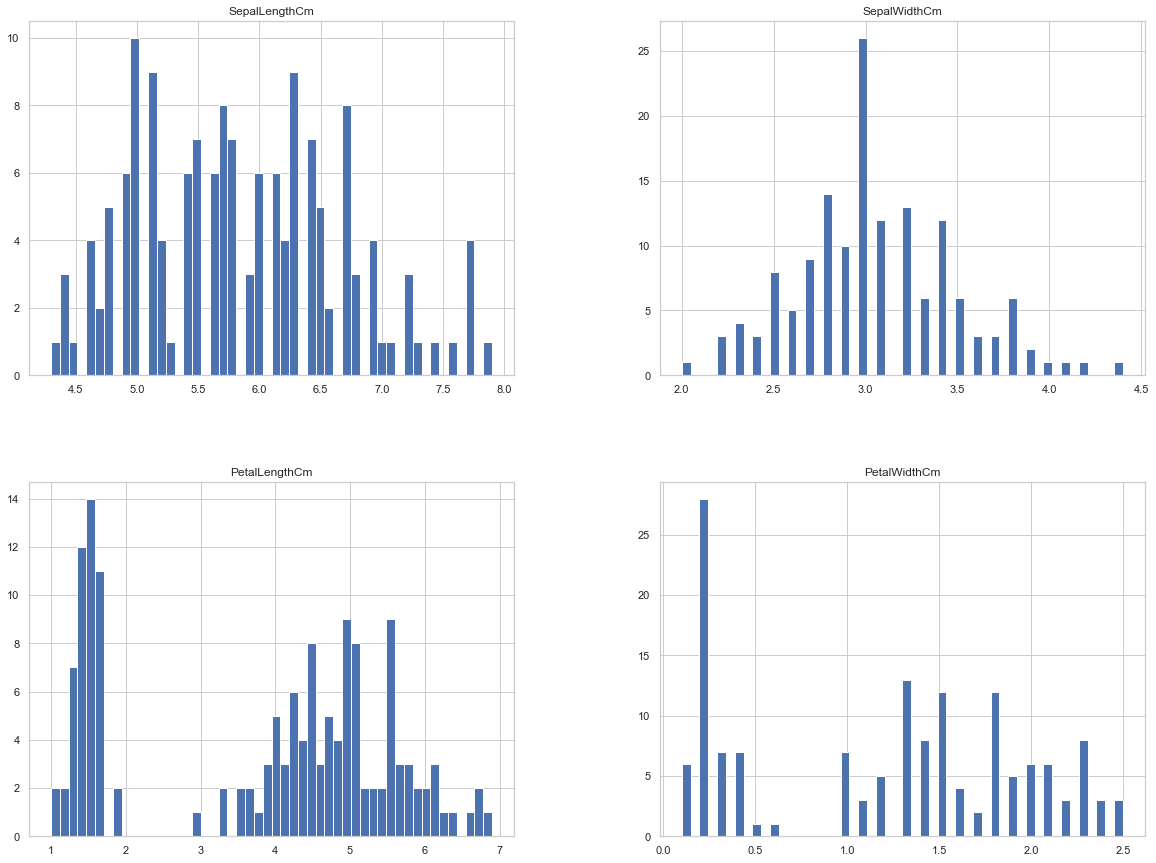

In [30]:
# See the histogram plot of IRIS DataFrame
# Univariate Distribution of Each Variable
IRIS.hist(bins=50, figsize=(20, 15))
show()

<AxesSubplot:>

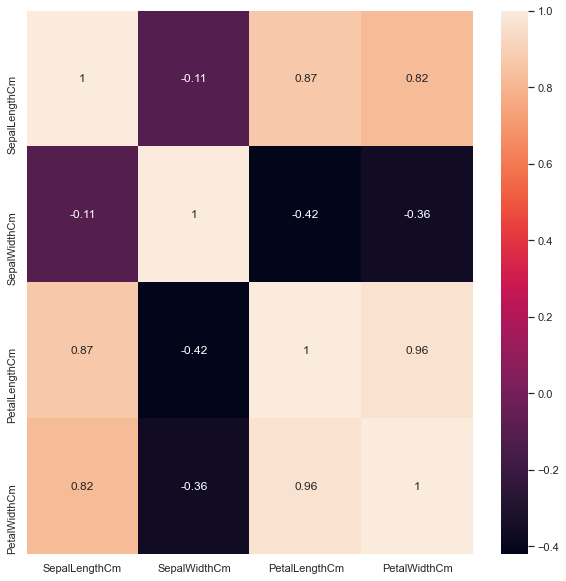

In [31]:
# Correlation plot by using heatmap
heatmap(IRIS.corr(), annot=True)

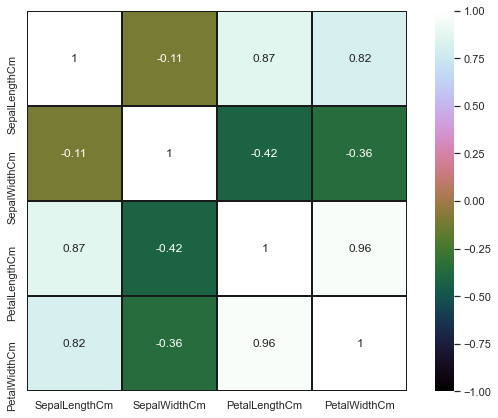

In [32]:
fig=gcf()
fig.set_size_inches(10,7)
fig=heatmap(IRIS.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [33]:
#Displaying correlation among all the Numeric columns
IRIS.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

In [34]:
import phik
from phik import report
# get the phi-K correlation matrix between all variables
IRIS.phik_matrix(interval_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000      0.563852       0.793421      0.729882   
SepalWidthCm        0.563852      1.000000       0.505263      0.722143   
PetalLengthCm       0.793421      0.505263       1.000000      0.778498   
PetalWidthCm        0.729882      0.722143       0.778498      1.000000   
Species             0.753425      0.599256       0.994493      0.951468   

                Species  
SepalLengthCm  0.753425  
SepalWidthCm   0.599256  
PetalLengthCm  0.994493  
PetalWidthCm   0.951468  
Species        1.000000

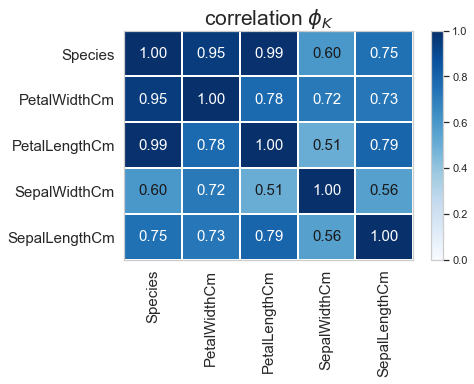

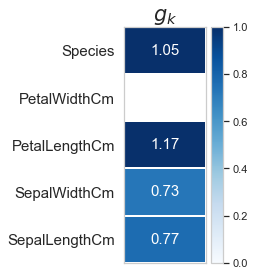

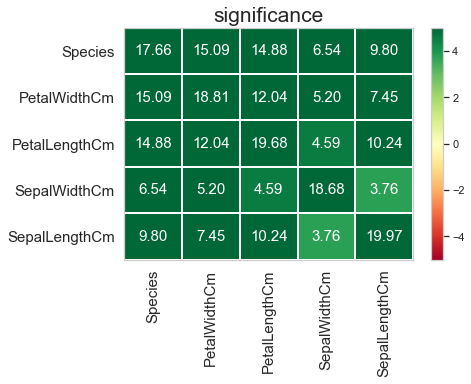

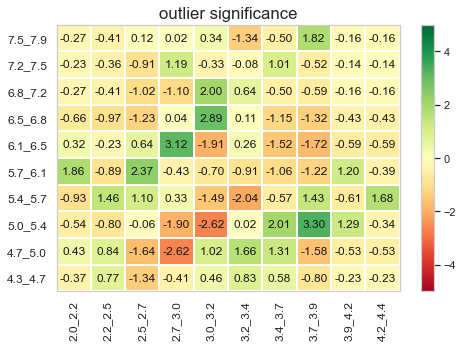

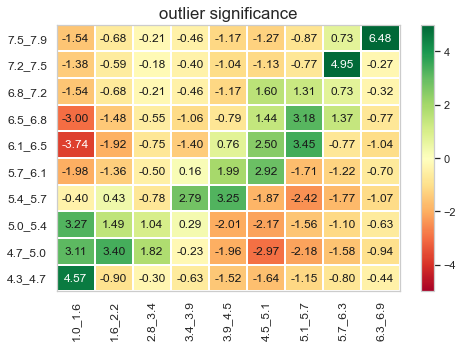

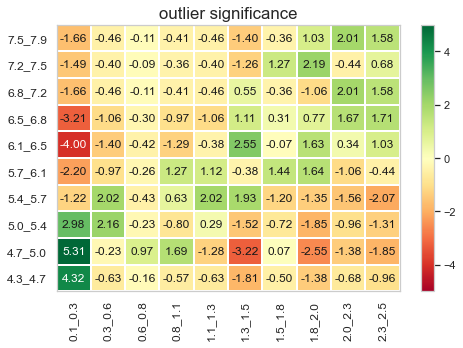

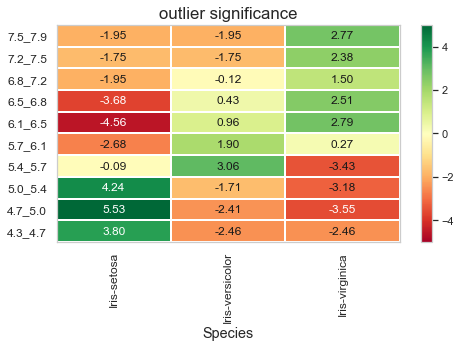

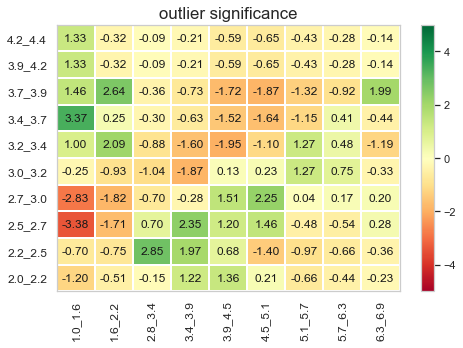

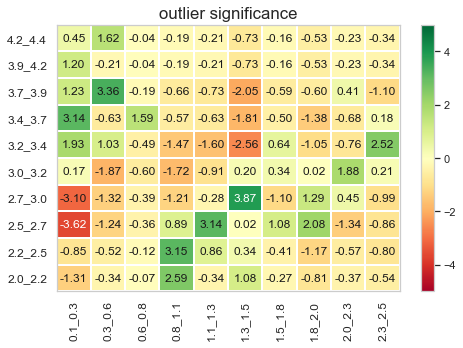

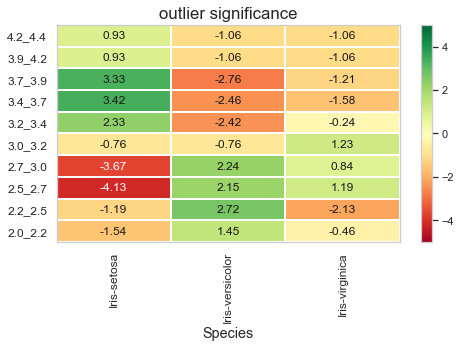

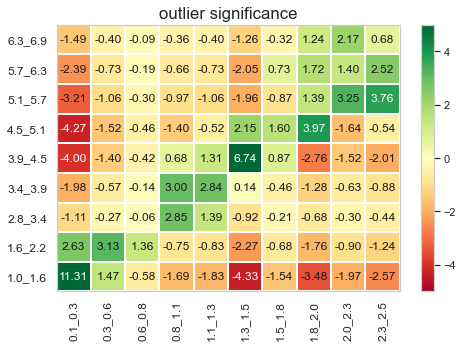

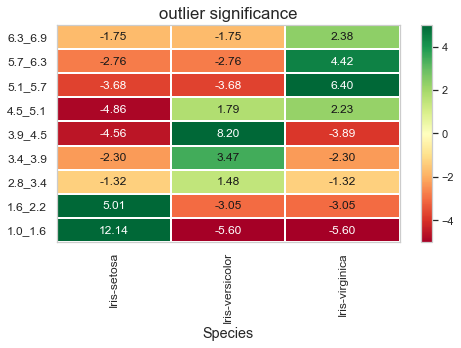

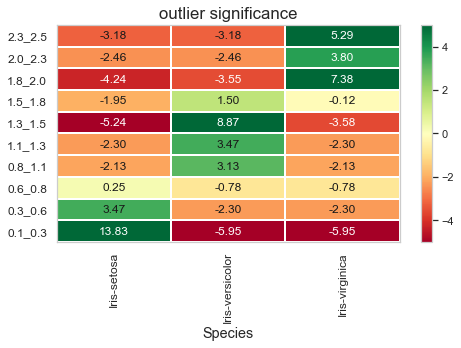

In [35]:
# generate a phik correlation report and save as test.pdf
report.correlation_report(data=IRIS,interval_cols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
show()

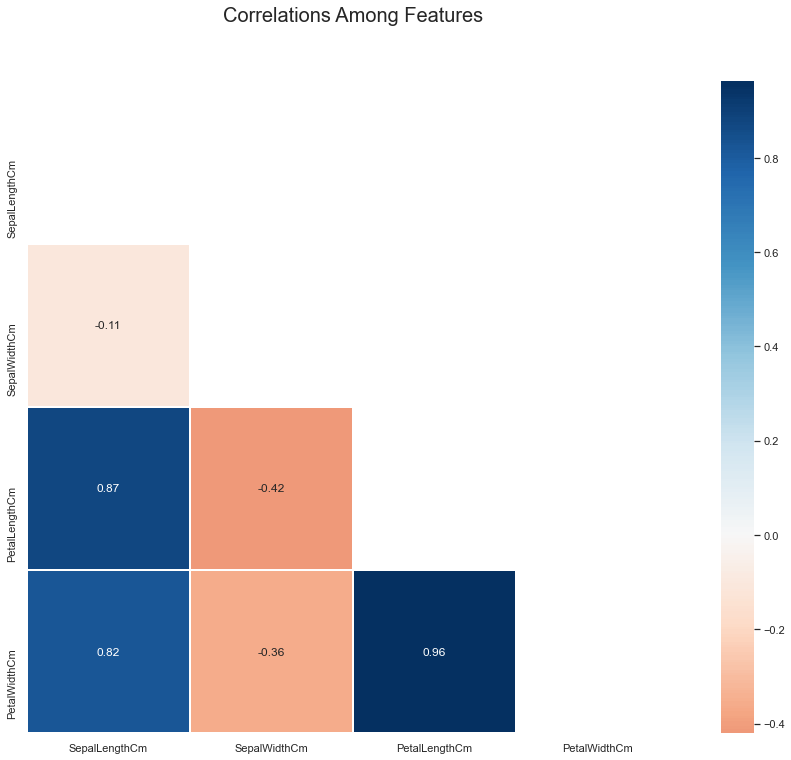

In [36]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = zeros_like(IRIS.corr(), dtype=bool)
mask[triu_indices_from(mask)] = True
set_style('whitegrid')
subplots(figsize = (15,12))
heatmap(IRIS.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

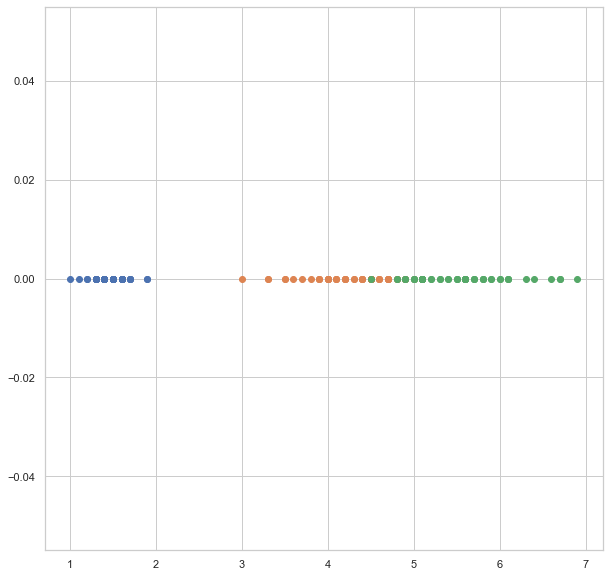

In [37]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of PetalLengthCm
IRIS_setosa = IRIS.loc[IRIS["Species"] == "Iris-setosa"];
IRIS_virginica = IRIS.loc[IRIS["Species"] == "Iris-virginica"];
IRIS_versicolor = IRIS.loc[IRIS["Species"] == "Iris-versicolor"];
#print(iris_setosa["petal_length"])
plot(IRIS_setosa["PetalLengthCm"], zeros_like(IRIS_setosa['PetalLengthCm']), 'o')
plot(IRIS_versicolor["PetalLengthCm"], zeros_like(IRIS_versicolor['PetalLengthCm']), 'o')
plot(IRIS_virginica["PetalLengthCm"], zeros_like(IRIS_virginica['PetalLengthCm']), 'o')

show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

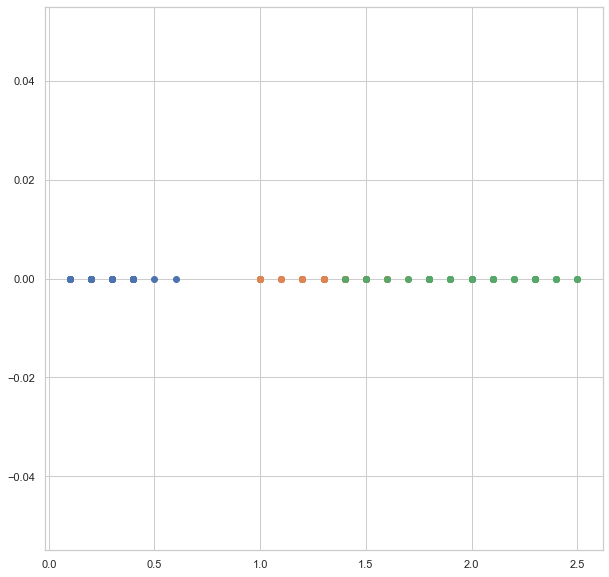

In [38]:
#print(iris_setosa["PetalWidthCm"])
plot(IRIS_setosa["PetalWidthCm"], zeros_like(IRIS_setosa['PetalWidthCm']), 'o')
plot(IRIS_versicolor["PetalWidthCm"], zeros_like(IRIS_versicolor['PetalWidthCm']), 'o')
plot(IRIS_virginica["PetalWidthCm"], zeros_like(IRIS_virginica['PetalWidthCm']), 'o')

show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

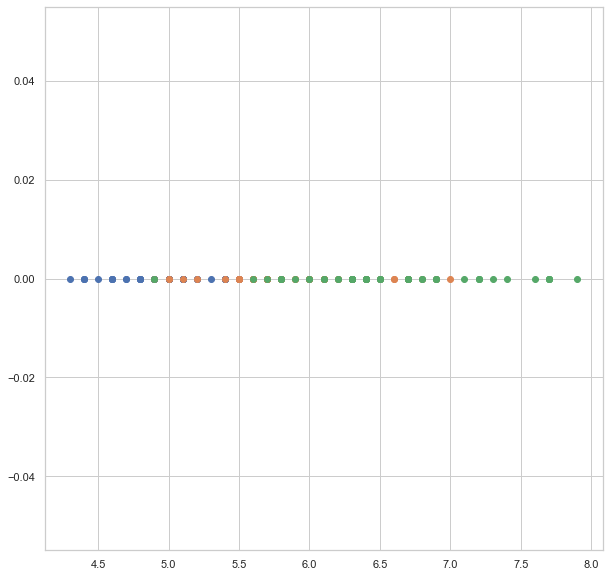

In [39]:
#print(iris_setosa["SepalLengthCm"])
plot(IRIS_setosa["SepalLengthCm"], zeros_like(IRIS_setosa['SepalLengthCm']), 'o')
plot(IRIS_versicolor["SepalLengthCm"], zeros_like(IRIS_versicolor['SepalLengthCm']), 'o')
plot(IRIS_virginica["SepalLengthCm"], zeros_like(IRIS_virginica['SepalLengthCm']), 'o')

show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

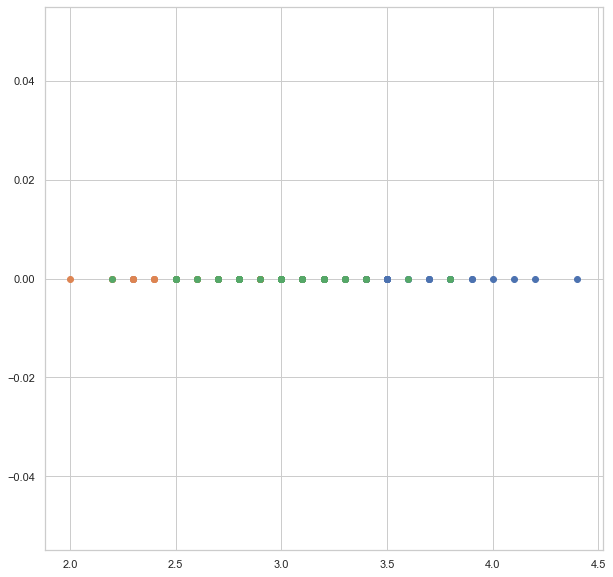

In [40]:
#print(iris_setosa["SepalWidthCm"])
plot(IRIS_setosa["SepalWidthCm"], zeros_like(IRIS_setosa['SepalWidthCm']), 'o')
plot(IRIS_versicolor["SepalWidthCm"], zeros_like(IRIS_versicolor['SepalWidthCm']), 'o')
plot(IRIS_virginica["SepalWidthCm"], zeros_like(IRIS_virginica['SepalWidthCm']), 'o')

show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

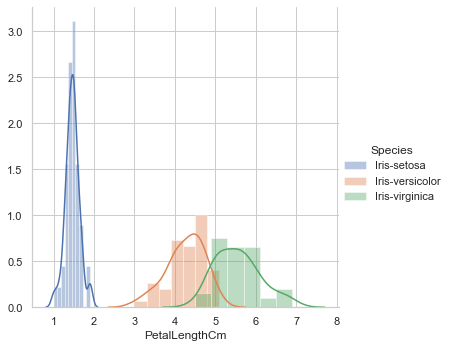

In [41]:
FacetGrid(IRIS, hue="Species", size=5) \
   .map(distplot, "PetalLengthCm") \
   .add_legend();
show();

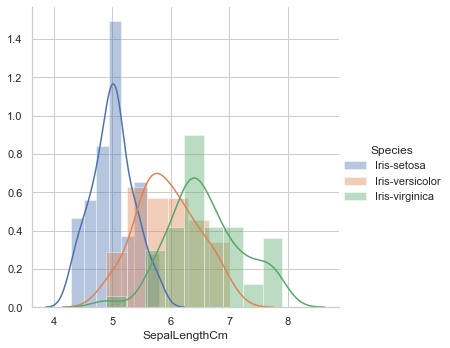

In [42]:
FacetGrid(IRIS, hue="Species", size=5) \
   .map(distplot, "SepalLengthCm") \
   .add_legend()
show()

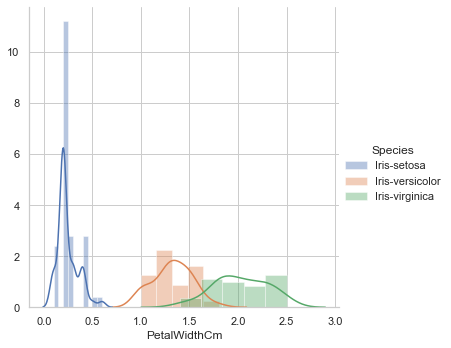

In [43]:
FacetGrid(IRIS, hue="Species", size=5) \
   .map(distplot, "PetalWidthCm") \
   .add_legend()
show()

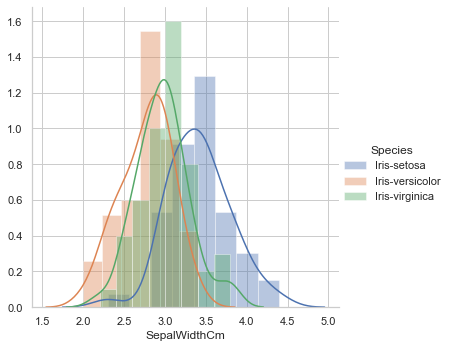

In [44]:
FacetGrid(IRIS, hue="Species", size=5) \
   .map(distplot, "SepalWidthCm") \
   .add_legend()
show()

## Violin Plot

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

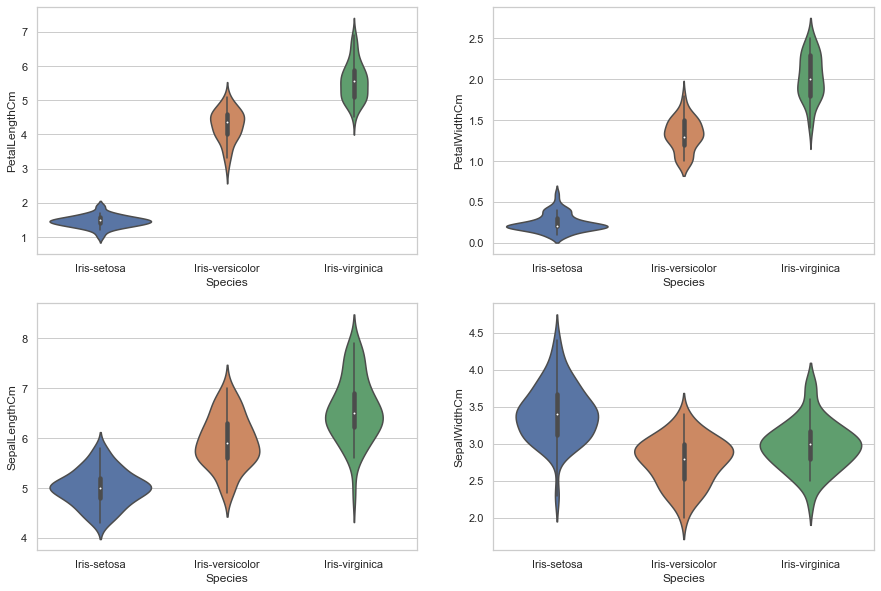

In [45]:
figure(figsize=(15,10))
subplot(2,2,1)
violinplot(x='Species',y='PetalLengthCm',data=IRIS)
subplot(2,2,2)
violinplot(x='Species',y='PetalWidthCm',data=IRIS)
subplot(2,2,3)
violinplot(x='Species',y='SepalLengthCm',data=IRIS)
subplot(2,2,4)
violinplot(x='Species',y='SepalWidthCm',data=IRIS)

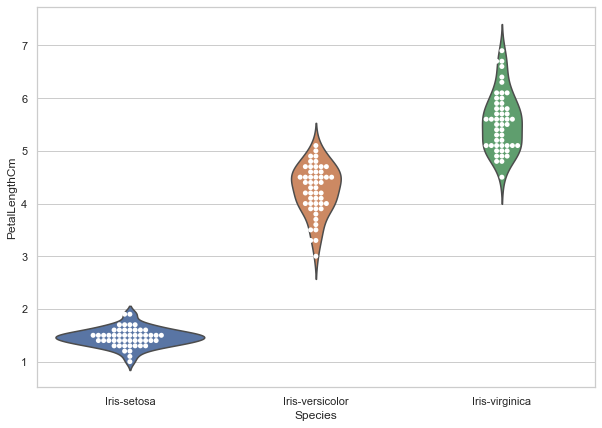

In [46]:
set(style="whitegrid")
fig=gcf()
fig.set_size_inches(10,7)
ax = violinplot(x="Species", y="PetalLengthCm", data=IRIS, inner=None)
ax = swarmplot(x="Species", y="PetalLengthCm", data=IRIS,color="white", edgecolor="black")

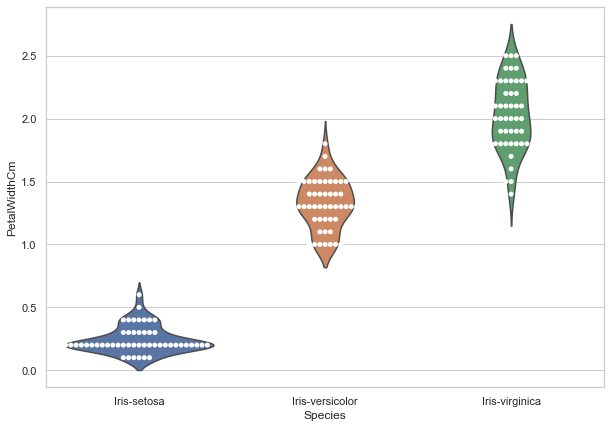

In [47]:
set(style="whitegrid")
fig=gcf()
fig.set_size_inches(10,7)
ax = violinplot(x="Species", y="PetalWidthCm", data=IRIS, inner=None)
ax = swarmplot(x="Species", y="PetalWidthCm", data=IRIS,color="white", edgecolor="black")

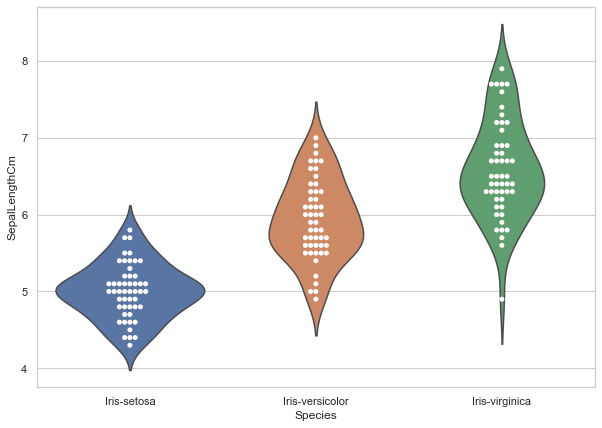

In [48]:
set(style="whitegrid")
fig=gcf()
fig.set_size_inches(10,7)
ax = violinplot(x="Species", y="SepalLengthCm", data=IRIS, inner=None)
ax = swarmplot(x="Species", y="SepalLengthCm", data=IRIS,color="white", edgecolor="black")

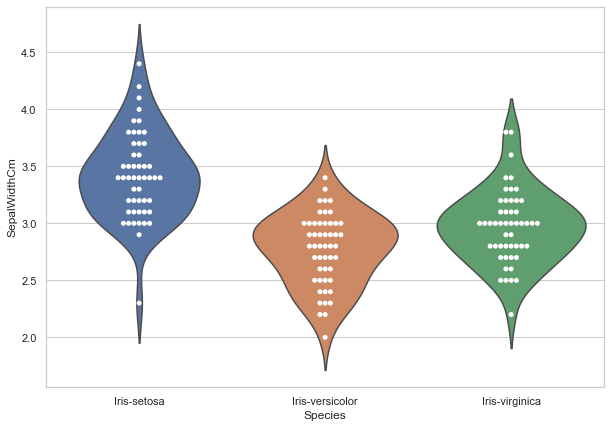

In [49]:
set(style="whitegrid")
fig=gcf()
fig.set_size_inches(10,7)
ax = violinplot(x="Species", y="SepalWidthCm", data=IRIS, inner=None)
ax = swarmplot(x="Species", y="SepalWidthCm", data=IRIS,color="white", edgecolor="black")

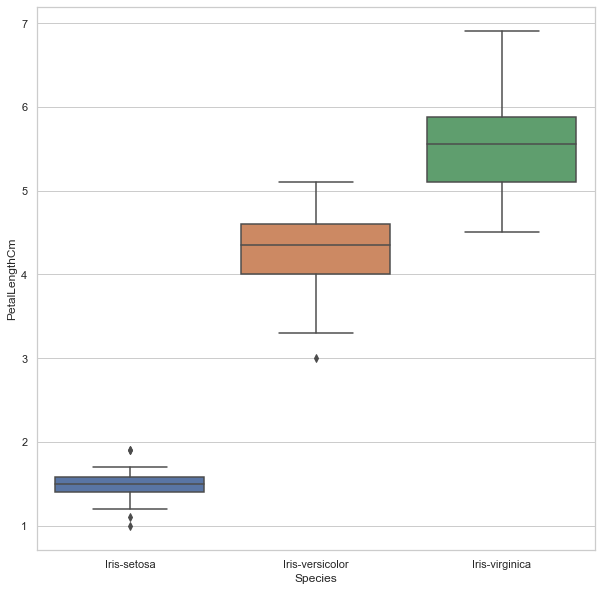

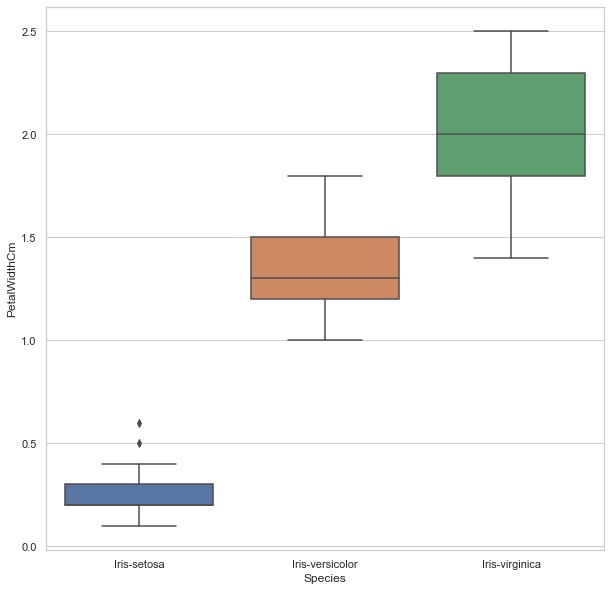

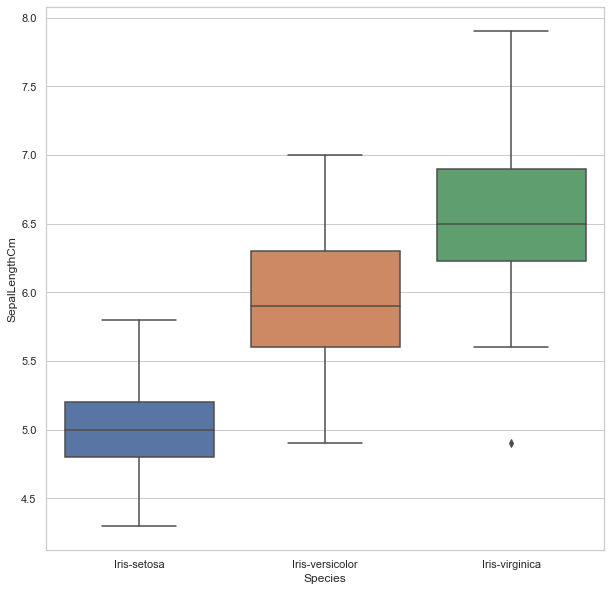

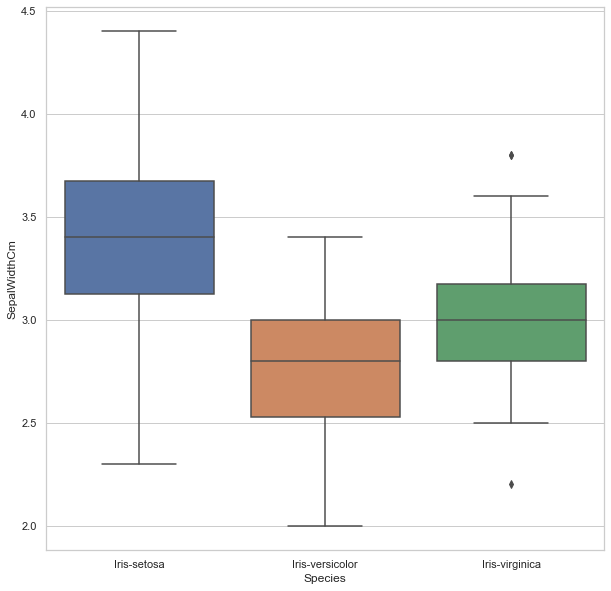

In [50]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

boxplot(x='Species',y='PetalLengthCm', data=IRIS)
show()
boxplot(x='Species',y='PetalWidthCm', data=IRIS)
show()
boxplot(x='Species',y='SepalLengthCm', data=IRIS)
show()
boxplot(x='Species',y='SepalWidthCm', data=IRIS)
show()

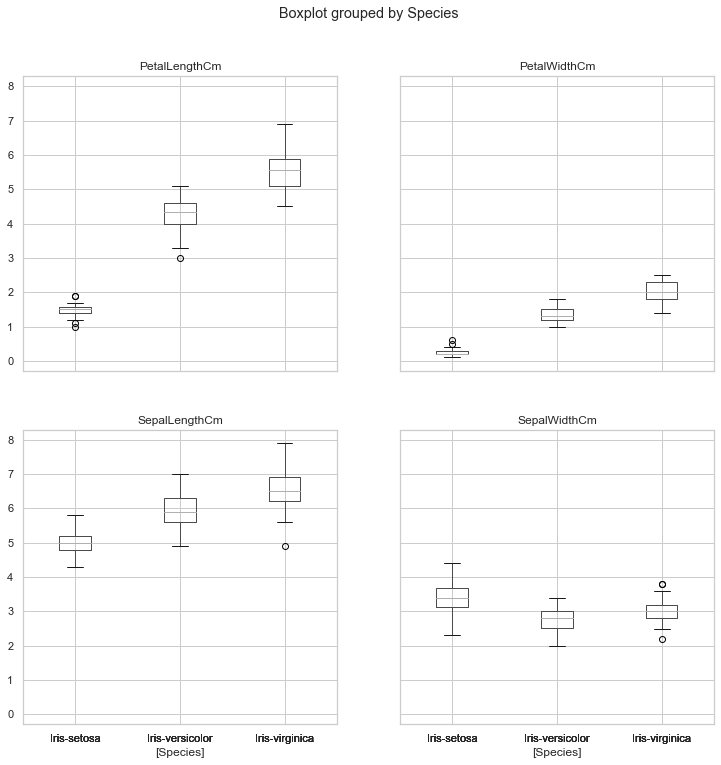

In [51]:
IRIS.boxplot(by="Species", figsize=(12, 12))
show()

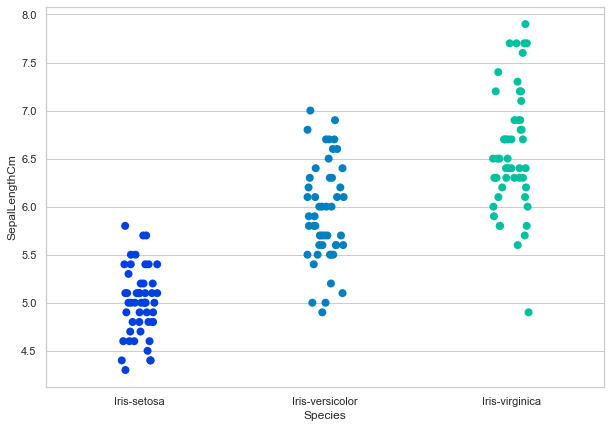

In [52]:
fig=gcf()
fig.set_size_inches(10,7)
fig=stripplot(x='Species',y='SepalLengthCm',data=IRIS,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

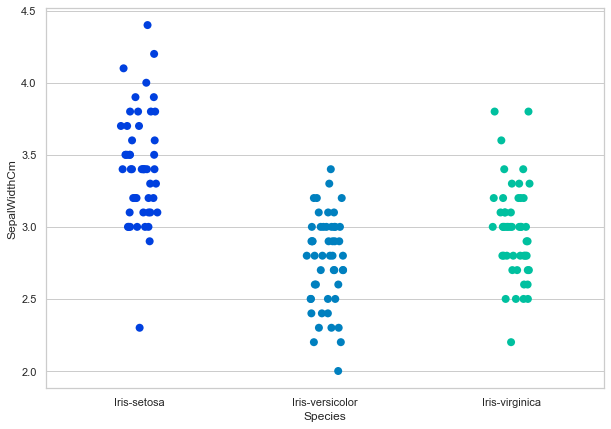

In [53]:
fig=gcf()
fig.set_size_inches(10,7)
fig=stripplot(x='Species',y='SepalWidthCm',data=IRIS,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

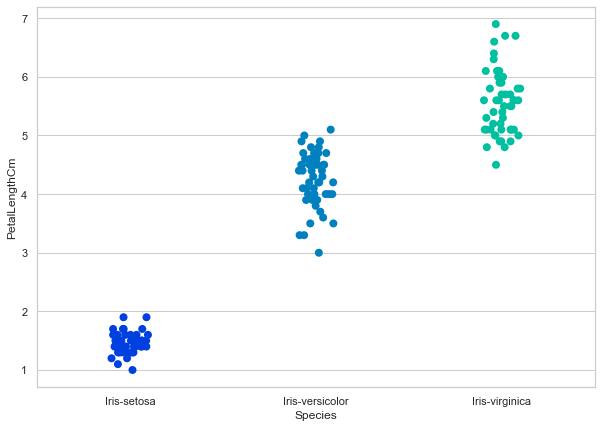

In [54]:
fig=gcf()
fig.set_size_inches(10,7)
fig=stripplot(x='Species',y='PetalLengthCm',data=IRIS,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

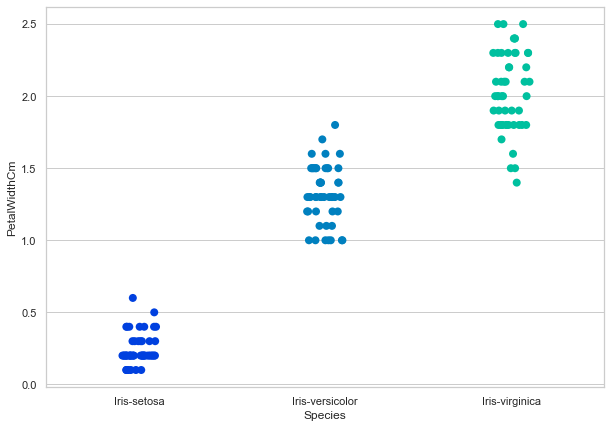

In [55]:
fig=gcf()
fig.set_size_inches(10,7)
fig=stripplot(x='Species',y='PetalWidthCm',data=IRIS,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

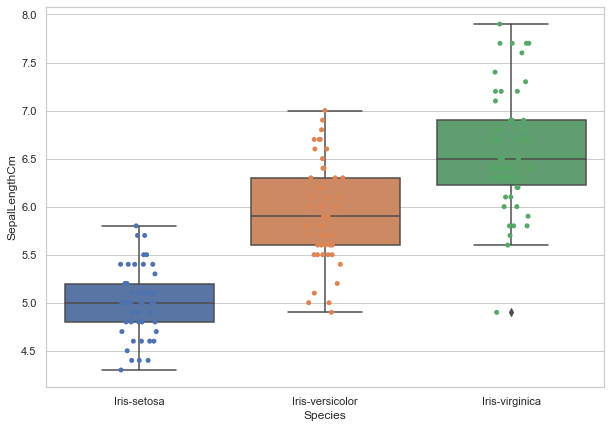

In [56]:
fig=gcf()
fig.set_size_inches(10,7)
fig=boxplot(x='Species',y='SepalLengthCm',data=IRIS)
fig=stripplot(x='Species',y='SepalLengthCm',data=IRIS,jitter=True,edgecolor='gray')

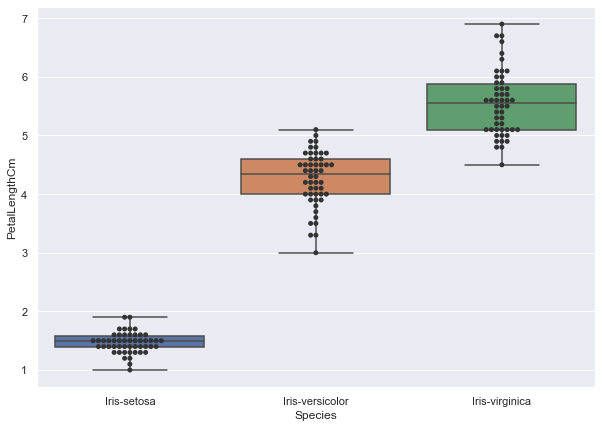

In [57]:
set(style="darkgrid")
fig=gcf()
fig.set_size_inches(10,7)
fig= boxplot(x="Species", y="PetalLengthCm", data=IRIS, whis=inf)
fig= swarmplot(x="Species", y="PetalLengthCm", data=IRIS, color=".2")

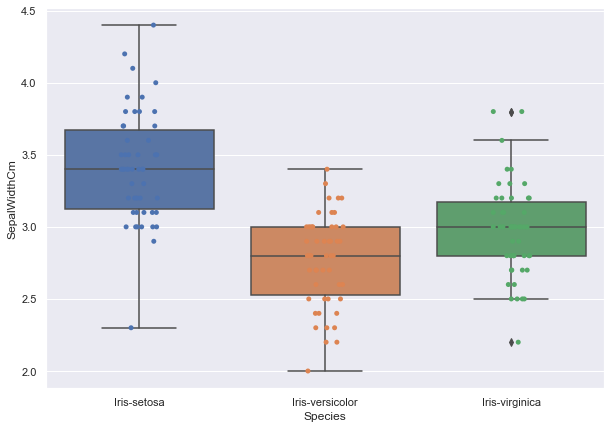

In [58]:
fig=gcf()
fig.set_size_inches(10,7)
fig=boxplot(x='Species',y='SepalWidthCm',data=IRIS)
fig=stripplot(x='Species',y='SepalWidthCm',data=IRIS,jitter=True,edgecolor='gray')

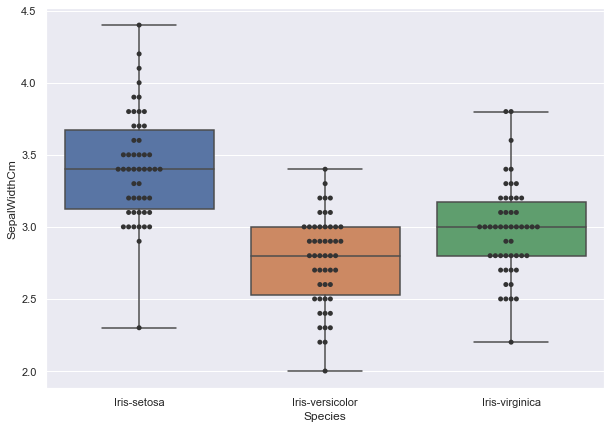

In [59]:
set(style="darkgrid")
fig=gcf()
fig.set_size_inches(10,7)
fig= boxplot(x="Species", y="SepalWidthCm", data=IRIS, whis=inf)
fig= swarmplot(x="Species", y="SepalWidthCm", data=IRIS, color=".2")

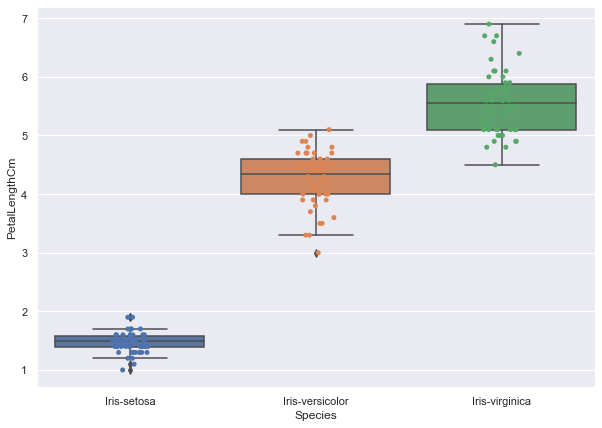

In [60]:
fig=gcf()
fig.set_size_inches(10,7)
fig=boxplot(x='Species',y='PetalLengthCm',data=IRIS)
fig=stripplot(x='Species',y='PetalLengthCm',data=IRIS,jitter=True,edgecolor='gray')

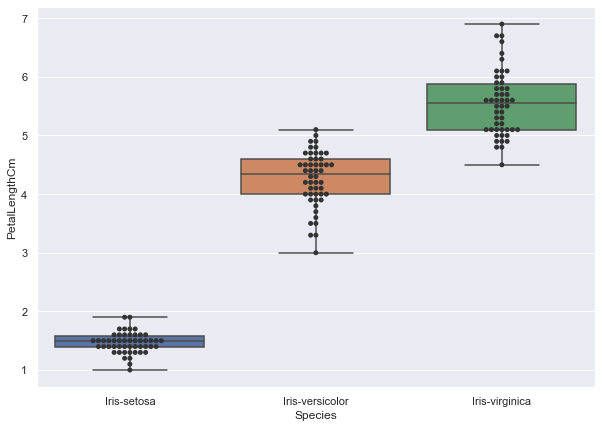

In [61]:
set(style="darkgrid")
fig=gcf()
fig.set_size_inches(10,7)
fig= boxplot(x="Species", y="PetalLengthCm", data=IRIS, whis=inf)
fig= swarmplot(x="Species", y="PetalLengthCm", data=IRIS, color=".2")

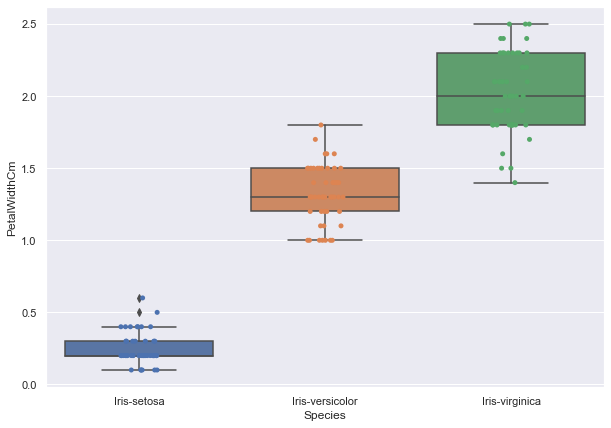

In [62]:
fig=gcf()
fig.set_size_inches(10,7)
fig=boxplot(x='Species',y='PetalWidthCm',data=IRIS)
fig=stripplot(x='Species',y='PetalWidthCm',data=IRIS,jitter=True,edgecolor='gray')

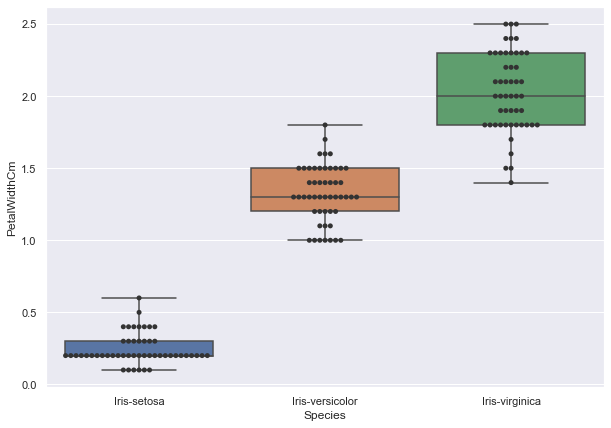

In [63]:
set(style="darkgrid")
fig=gcf()
fig.set_size_inches(10,7)
fig= boxplot(x="Species", y="PetalWidthCm", data=IRIS, whis=inf)
fig= swarmplot(x="Species", y="PetalWidthCm", data=IRIS, color=".2")

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

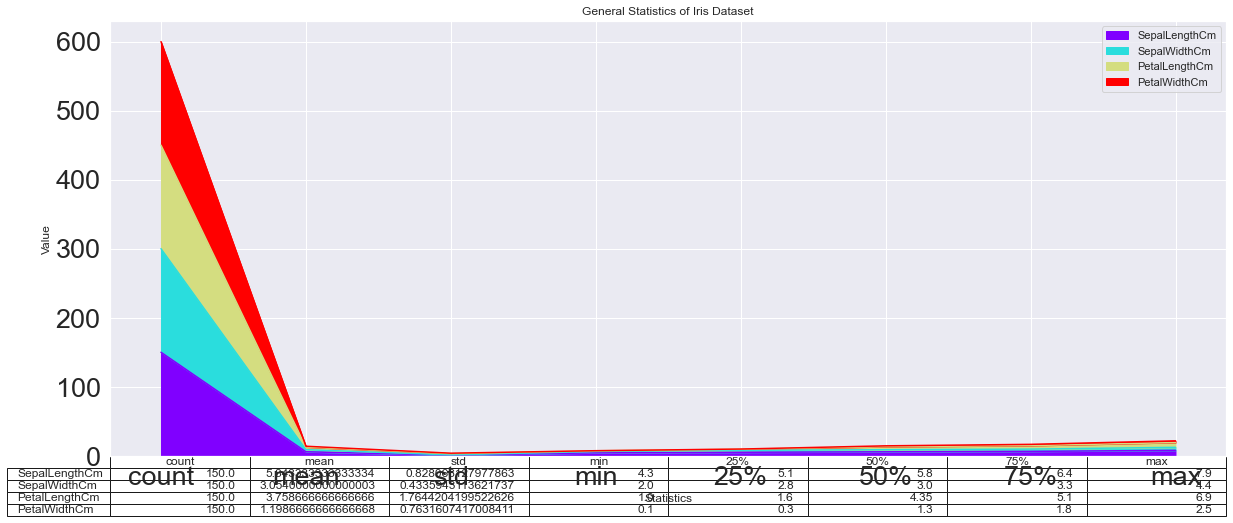

In [64]:
IRIS.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True, colormap="rainbow")
xlabel('Statistics',)
ylabel('Value')
title("General Statistics of Iris Dataset")

In [65]:
#"Species" is Nominal(Categorical)Dependent Variable
#"SepalLengthCm" is Continuous(Ratio Scale)Independent Variable

#To find Correlation between "Species" & "SepalLengthCm" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "Species" & Iris "SepalLengthCm"
#Sampling of "SepalLengthCm" for each category of "Species"
Iris_setosa=IRIS[IRIS.Species=='Iris-setosa']
Iris_virginica=IRIS[IRIS.Species=='Iris-virginica']
Iris_versicolor=IRIS[IRIS.Species=='Iris-versicolor']


#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import kruskal
stat,pvalue=kruskal(Iris_setosa.SepalLengthCm,Iris_virginica.SepalLengthCm,Iris_versicolor.SepalLengthCm)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and SepalLengthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and SepalLengthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "SepalLengthCm" & "Species" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "Species" & Iris "SepalLengthCm"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test
stat,pvalue,GrandMedian,ContigTable=median_test(Iris_setosa.SepalLengthCm,Iris_virginica.SepalLengthCm,Iris_versicolor.SepalLengthCm)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and SepalLengthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and SepalLengthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

Alternate Hypothesis (H1): Species and SepalLengthCm have some form of relationship.
Confidence Level : 100.0 %
Statistics=96.937, p=0.000
5.8
[[ 0 44 26]
 [50  6 24]]
Alternate Hypothesis (H1): Species and SepalLengthCm have some form of relationship.
Confidence Level : 100.0 %
Statistics=78.643, p=0.000


In [66]:
#"Species" is Nominal(Categorical) Dependent Variable
#"SepalWidthCm" is Continuous(Ratio Scale) Independent Variable

#To find Correlation between "SepalWidthCm" & "Species" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "SepalWidthCm" & Iris "Species"
#Sampling of "SepalWidthCm" for each category of "Species"
Iris_setosa=IRIS[IRIS.Species=='Iris-setosa']
Iris_virginica=IRIS[IRIS.Species=='Iris-virginica']
Iris_versicolor=IRIS[IRIS.Species=='Iris-versicolor']


#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import kruskal
stat,pvalue=kruskal(Iris_setosa.SepalWidthCm,Iris_virginica.SepalWidthCm,Iris_versicolor.SepalWidthCm)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and SepalWidthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and SepalWidthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Species" & "SepalWidthCm" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "SepalWidthCm" & Iris "Species"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test
stat,pvalue,GrandMedian,ContigTable=median_test(Iris_setosa.SepalWidthCm,Iris_virginica.SepalWidthCm,Iris_versicolor.SepalWidthCm)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and SepalWidthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and SepalWidthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

Alternate Hypothesis (H1): Species and SepalWidthCm have some form of relationship.
Confidence Level : 99.99999999999731 %
Statistics=62.495, p=0.000
3.0
[[42 17  8]
 [ 8 33 42]]
Alternate Hypothesis (H1): Species and SepalWidthCm have some form of relationship.
Confidence Level : 99.99999999875884 %
Statistics=50.225, p=0.000


In [67]:
#"Species" is Nominal(Categorical) Dependent Variable
#"PetalLengthCm" is Continuous(Ratio Scale) Independent Variable

#To find Correlation between "Species" & "PetalLengthCm" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "Species" & Iris "PetalLengthCm"
#Sampling of "Species" for each category of "PetalLengthCm"
Iris_setosa=IRIS[IRIS.Species=='Iris-setosa']
Iris_virginica=IRIS[IRIS.Species=='Iris-virginica']
Iris_versicolor=IRIS[IRIS.Species=='Iris-versicolor']


#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import kruskal
stat,pvalue=kruskal(Iris_setosa.PetalLengthCm,Iris_virginica.PetalLengthCm,Iris_versicolor.PetalLengthCm)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and PetalLengthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and PetalLengthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "PetalLengthCm" & "Species" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "Species" & Iris "PetalLengthCm"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test
stat,pvalue,GrandMedian,ContigTable=median_test(Iris_setosa.PetalLengthCm,Iris_virginica.PetalLengthCm,Iris_versicolor.PetalLengthCm)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and PetalLengthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and PetalLengthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

Alternate Hypothesis (H1): Species and PetalLengthCm have some form of relationship.
Confidence Level : 100.0 %
Statistics=130.414, p=0.000
4.35
[[ 0 50 25]
 [50  0 25]]
Alternate Hypothesis (H1): Species and PetalLengthCm have some form of relationship.
Confidence Level : 100.0 %
Statistics=100.000, p=0.000


In [68]:
#"Species" is Nominal(Categorical) Dependent Variable
#"PetalWidthCm" is Continuous(Ratio Scale) Independent Variable

#To find Correlation between "PetalWidthCm" & "Species" we will Perform Kruskal Wallis H Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "PetalWidthCm" & Iris "Species"
#Sampling of "PetalWidthCm" for each category of "Species"
Iris_setosa=IRIS[IRIS.Species=='Iris-setosa']
Iris_virginica=IRIS[IRIS.Species=='Iris-virginica']
Iris_versicolor=IRIS[IRIS.Species=='Iris-versicolor']


#Each Sample Must have at least 5 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import kruskal
stat,pvalue=kruskal(Iris_setosa.PetalWidthCm,Iris_virginica.PetalWidthCm,Iris_versicolor.PetalWidthCm)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and PetalWidthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and PetalWidthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

#To find Correlation between "Species" & "PetalWidthCm" we will Perform Moods Median Test
#It is Non Parametric Version of One-Way-Anova
#Correlation between Iris "PetalWidthCm" & Iris "Species"
#Each Sample Must have at least 1 measurements
#At least two or more samples work for this test
#The samples are not required to have the same length
from scipy.stats import median_test
stat,pvalue,GrandMedian,ContigTable=median_test(Iris_setosa.PetalWidthCm,Iris_virginica.PetalWidthCm,Iris_versicolor.PetalWidthCm)
print(GrandMedian)
print(ContigTable)
if pvalue <= 0.05:
    print("Alternate Hypothesis (H1): Species and PetalWidthCm have some form of relationship.")
else:
    print("Null Hypothesis (H0) : Species and PetalWidthCm are independent of each other.")
print("Confidence Level : {} %".format(((1- pvalue)*100)))
print('Statistics=%.3f, p=%.3f' % (stat, pvalue))

Alternate Hypothesis (H1): Species and PetalWidthCm have some form of relationship.
Confidence Level : 100.0 %
Statistics=131.093, p=0.000
1.3
[[ 0 50 22]
 [50  0 28]]
Alternate Hypothesis (H1): Species and PetalWidthCm have some form of relationship.
Confidence Level : 100.0 %
Statistics=100.641, p=0.000


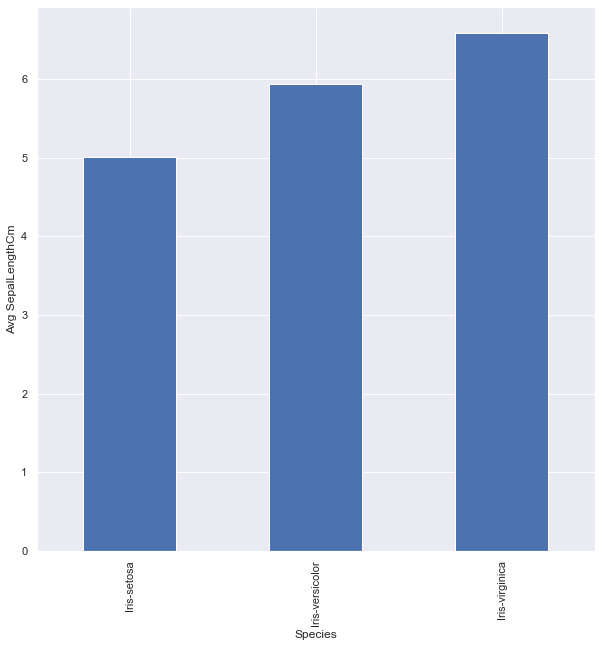

In [69]:
#Measures of Association between Iris "Species" & Iris "SepalLengthCm"
#Let's see the averSpecies Species of Passengers in each category of "SepalLengthCm" feature
#groupby() will be applied to "SepalLengthCm" & mean() will be applied to "Species" as per gropby() of "SepalLengthCm"
IRIS[['Species','SepalLengthCm']].groupby("Species").mean().plot(kind='bar',legend = False).set(xlabel='Species', ylabel='Avg SepalLengthCm')
xticks(rotation = 90) # 90 degree Vertical alignment of "SepalLengthCm" category names
show()
#There is No significant impact of Iris "SepalLengthCm" change with respect to Iris "Species" feature
#So Iris "SepalLengthCm" is not Iris "Species" feature sensitive

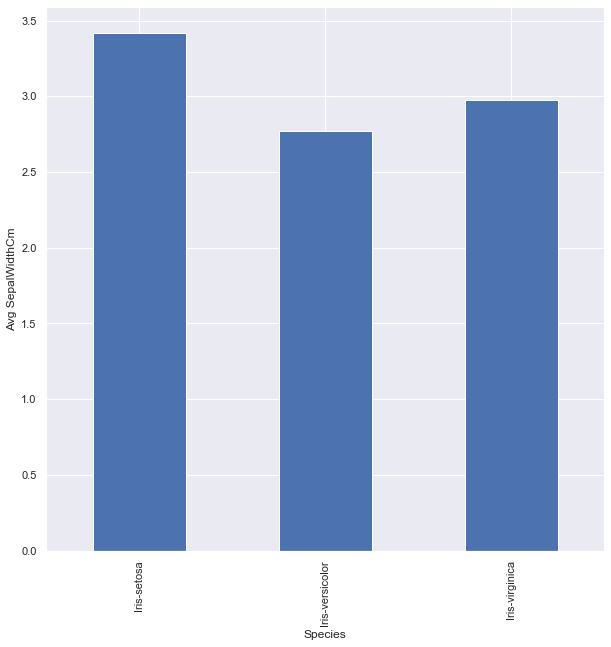

In [70]:
#Measures of Association between Iris "Species" & Iris "SepalWidthCm"
#Let's see the averSpecies Species of Passengers in each category of "SepalWidthCm" feature
#groupby() will be applied to "SepalWidthCm" & mean() will be applied to "Species" as per gropby() of "SepalWidthCm"
IRIS[['Species','SepalWidthCm']].groupby("Species").mean().plot(kind='bar',legend = False).set(xlabel='Species', ylabel='Avg SepalWidthCm')
xticks(rotation = 90) # 90 degree Vertical alignment of "SepalWidthCm" category names
show()
#There is No significant impact of Iris "SepalWidthCm" change with respect to Iris "Species" feature
#So Iris "SepalWidthCm" is not Iris "Species" feature sensitive

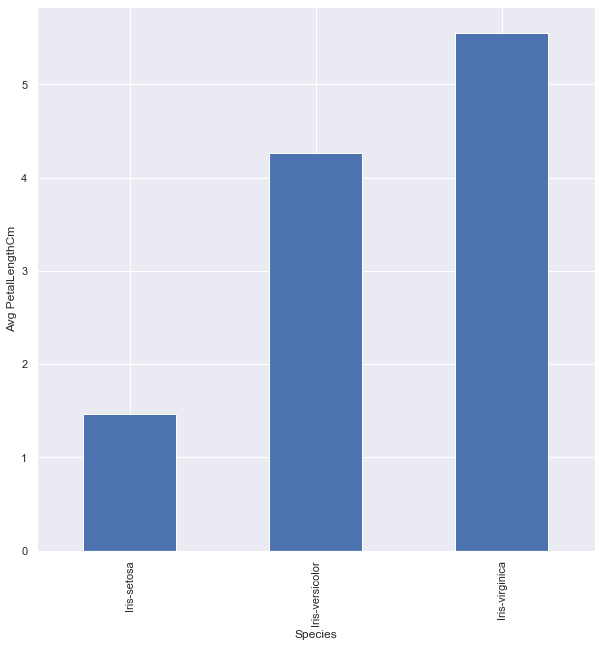

In [71]:
#Measures of Association between Iris "PetalLengthCm" & Iris "Species"
#Let's see the averPetalLengthCm PetalLengthCm of Passengers in each category of "Species" feature
#groupby() will be applied to "Species" & mean() will be applied to "PetalLengthCm" as per gropby() of "Species"
IRIS[['Species','PetalLengthCm']].groupby("Species").mean().plot(kind='bar',legend = False).set(xlabel='Species', ylabel='Avg PetalLengthCm')
xticks(rotation = 90) # 90 degree Vertical alignment of "Species" category names
show()
#There is No significant impact of Iris "Species" change with respect to Iris "PetalLengthCm" feature
#So Iris "Species" is not Iris "PetalLengthCm" feature sensitive

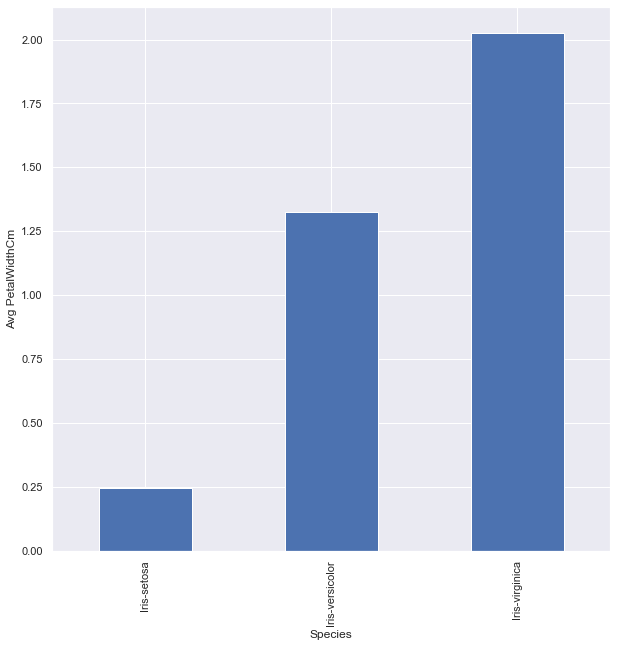

In [72]:
#Measures of Association between IRIS "Species" & IRIS "PetalWidthCm"
#Let's see the averSpecies Species of Passengers in each category of "PetalWidthCm" feature
#groupby() will be applied to "PetalWidthCm" & mean() will be applied to "Species" as per gropby() of "PetalWidthCm"
IRIS[['Species','PetalWidthCm']].groupby("Species").mean().plot(kind='bar',legend = False).set(xlabel='Species', ylabel='Avg PetalWidthCm')
xticks(rotation = 90) # 90 degree Vertical alignment of "PetalWidthCm" category names
show()
#There is No significant impact of IRIS "PetalWidthCm" change with respect to IRIS "Species" feature
#So IRIS "PetalWidthCm" is not IRIS "Species" feature sensitive

# KNN

In [73]:
#DataFrame Separation for Encoding
Label=IRIS['Species']
Continuous=IRIS[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [74]:
# Continuous Feature Scaling(Scaling of features)
# Continuous Features will be in 2D Array
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
Continuous=StandardScaler.fit_transform(Continuous) #Scaling of Features part for optimisation

# Check data type and dimention
# While Converting into DataFrame always provide columns name
Continuous=DataFrame(Continuous,columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']) #Converting Features into 2D DataFrame
type(Continuous),ndim(Continuous),Continuous.shape

(pandas.core.frame.DataFrame, 2, (150, 4))

In [75]:
#Final ConCatination For Creating Features
#Features will be 2D DataFrame
#No Continuous
Features=Continuous

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20)

Text(0, 0.5, 'Error Rate')

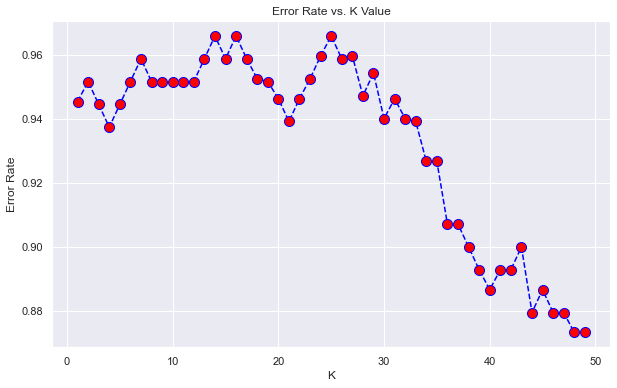

In [77]:
#Euclidean 2D/3D/4D/5D/nD distance between 2 points
# n=number of numeric features=number of dimentions
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Will take some time
accuracy_rate = []
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,Features,Label,cv=20)
    accuracy_rate.append(score.mean())
    
# Will take some time
error_rate = []
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,Features,Label,cv=20)
    error_rate.append(1-score.mean())
    
# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(mean(pred_i != Y_test))
    
figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
title('Error Rate vs. K Value')
xlabel('K')
ylabel('Error Rate')

In [78]:
# For loop to check ideal sample that will give generalized model
#Test1
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    IrisKNN=KNeighborsClassifier(n_neighbors=48)
    
    IrisKNN.fit(X_train,Y_train)
    
    train_score=IrisKNN.score(X_train,Y_train)
    
    test_score=IrisKNN.score(X_test,Y_test)
    
    if test_score > train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 0.9 Train: 0.8833333333333333 RandomState: 1
Test: 0.9 Train: 0.8666666666666667 RandomState: 2
Test: 0.8666666666666667 Train: 0.8583333333333333 RandomState: 5
Test: 0.9666666666666667 Train: 0.8666666666666667 RandomState: 9
Test: 0.8666666666666667 Train: 0.85 RandomState: 10
Test: 0.9333333333333333 Train: 0.85 RandomState: 14
Test: 0.9333333333333333 Train: 0.85 RandomState: 15
Test: 0.9333333333333333 Train: 0.875 RandomState: 18
Test: 0.9666666666666667 Train: 0.875 RandomState: 24
Test: 0.9333333333333333 Train: 0.875 RandomState: 25
Test: 0.9333333333333333 Train: 0.875 RandomState: 26
Test: 0.9 Train: 0.8666666666666667 RandomState: 27
Test: 0.9 Train: 0.8833333333333333 RandomState: 30
Test: 0.9 Train: 0.85 RandomState: 38
Test: 0.9333333333333333 Train: 0.875 RandomState: 39
Test: 0.9333333333333333 Train: 0.875 RandomState: 40
Test: 0.9666666666666667 Train: 0.8666666666666667 RandomState: 42
Test: 0.9 Train: 0.875 RandomState: 47
Test: 0.9333333333333333 Train: 0.8

Test: 0.9 Train: 0.8833333333333333 RandomState: 327
Test: 0.9333333333333333 Train: 0.8416666666666667 RandomState: 331
Test: 0.9 Train: 0.875 RandomState: 334
Test: 0.9 Train: 0.8833333333333333 RandomState: 336
Test: 0.9 Train: 0.8916666666666667 RandomState: 337
Test: 0.8666666666666667 Train: 0.85 RandomState: 338
Test: 0.9333333333333333 Train: 0.8833333333333333 RandomState: 339
Test: 0.9666666666666667 Train: 0.8666666666666667 RandomState: 342
Test: 0.8666666666666667 Train: 0.8583333333333333 RandomState: 344
Test: 0.9666666666666667 Train: 0.8833333333333333 RandomState: 346
Test: 0.9 Train: 0.875 RandomState: 347
Test: 0.9333333333333333 Train: 0.8666666666666667 RandomState: 348
Test: 0.9 Train: 0.8916666666666667 RandomState: 351
Test: 0.9 Train: 0.8583333333333333 RandomState: 352
Test: 0.9333333333333333 Train: 0.8583333333333333 RandomState: 355
Test: 0.9 Train: 0.8416666666666667 RandomState: 356
Test: 0.9333333333333333 Train: 0.875 RandomState: 357
Test: 0.933333333

Test: 0.9 Train: 0.8833333333333333 RandomState: 667
Test: 0.9333333333333333 Train: 0.8833333333333333 RandomState: 671
Test: 0.9 Train: 0.8833333333333333 RandomState: 675
Test: 0.8666666666666667 Train: 0.8416666666666667 RandomState: 676
Test: 0.9 Train: 0.8666666666666667 RandomState: 677
Test: 0.9 Train: 0.8833333333333333 RandomState: 678
Test: 1.0 Train: 0.8916666666666667 RandomState: 679
Test: 0.9666666666666667 Train: 0.85 RandomState: 680
Test: 0.9 Train: 0.8833333333333333 RandomState: 681
Test: 0.9 Train: 0.8666666666666667 RandomState: 682
Test: 0.9333333333333333 Train: 0.8666666666666667 RandomState: 685
Test: 0.9333333333333333 Train: 0.8666666666666667 RandomState: 689
Test: 0.9 Train: 0.8666666666666667 RandomState: 690
Test: 0.9 Train: 0.8666666666666667 RandomState: 696
Test: 0.9333333333333333 Train: 0.85 RandomState: 698
Test: 0.8666666666666667 Train: 0.8416666666666667 RandomState: 701
Test: 0.9333333333333333 Train: 0.875 RandomState: 702
Test: 0.9 Train: 0.8

Test: 0.9333333333333333 Train: 0.875 RandomState: 988
Test: 0.8666666666666667 Train: 0.8583333333333333 RandomState: 990
Test: 0.9 Train: 0.8666666666666667 RandomState: 995
Test: 1.0 Train: 0.8666666666666667 RandomState: 997


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(Features,Label,test_size=0.20,random_state=997)
IrisKNN=KNeighborsClassifier(n_neighbors=48)
IrisKNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=48)

In [80]:
IrisKNN.score(X_train,Y_train)

0.8666666666666667

In [81]:
IrisKNN.score(X_test,Y_test)

1.0

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IrisKNN.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           8                           0   
Iris-versicolore                      0                           8   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                          14

In [83]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(Y_test,IrisKNN.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [84]:
## Importing the model.
## Always give test_size=.20
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
## calling on the model oject. 
IrisKNN = KNeighborsClassifier(n_neighbors=48)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=5, test_size=.20, random_state=997)

accuracies = cross_val_score(IrisKNN, Features, Label, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.9        0.83333333 0.8        0.8        0.8       ]
Mean Cross-Validation accuracy score: 0.827


In [85]:
from sklearn.model_selection import GridSearchCV
## Always give test_size=.20
## trying out multiple values for k
k_range = range(1,50)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=5, test_size=.20, random_state=997)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
IrisKNN = GridSearchCV(KNeighborsClassifier(), param, cv=cv, verbose = False, n_jobs=-1)
## Fitting the model. 
IrisKNN.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=997, test_size=0.2,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [86]:
print(IrisKNN.best_score_)
print(IrisKNN.best_params_)
print(IrisKNN.best_estimator_)

0.9833333333333334
{'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=4, weights='distance')


In [87]:
### Using the best parameters from the grid-search.
IrisKNN= IrisKNN.best_estimator_
IrisKNN.score(X_test,Y_test)

0.9666666666666667

In [88]:
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IrisKNN.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           8                           0   
Iris-versicolore                      0                           7   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         1  
Iris-virginica                          14

In [89]:
print(classification_report(Y_test,IrisKNN.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Support Vector Machine

In [91]:
# Kernel Selection Process
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
kernel_list = ['linear','poly','rbf','sigmoid']
params = dict(kernel=kernel_list)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .20, random_state=2985)

IRIS_SVM_Solver_Select = svm.SVC(C=1.0, random_state=2985, class_weight='balanced')
Kernel_Type = GridSearchCV(IRIS_SVM_Solver_Select, params, cv=cv)
Kernel_Type.fit(X_train, Y_train)
scores = Kernel_Type.cv_results_['mean_test_score']

for score, kernel in zip(scores, kernel_list):
    print(f"  {kernel} {score:.3f}" )

  linear 0.967
  poly 0.917
  rbf 0.933
  sigmoid 0.900


In [92]:
# Looping Over The Parametres
# Here we have selected geomspace range for C value because it is probably best for finding Global Minimum Loss
Degree = [1,2,3,4,5,6,7,8,9,10]
params = dict(degree=Degree)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .20, random_state=2985)
IRIS_Poly_Degree_Select = svm.SVC(C=1.0, random_state=2985, class_weight='balanced', kernel='poly')
Degree_Type = GridSearchCV(IRIS_Poly_Degree_Select, params, cv=cv)
Degree_Type.fit(X_train, Y_train)
scores = Degree_Type.cv_results_['mean_test_score']

for score, degree in zip(scores, Degree):
    print(f"  {degree} {score:.3f}" )

  1 0.967
  2 0.833
  3 0.917
  4 0.742
  5 0.850
  6 0.767
  7 0.817
  8 0.725
  9 0.800
  10 0.717


In [93]:
# Kernel Selection Process
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
kernel_list = ['linear','poly','rbf','sigmoid']
params = dict(kernel=kernel_list)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .20, random_state=2985)

IRIS_SVM_Solver_Select = svm.SVC(C=1.0, random_state=2985, class_weight='balanced',degree=1)
Kernel_Type = GridSearchCV(IRIS_SVM_Solver_Select, params, cv=cv)
Kernel_Type.fit(X_train, Y_train)
scores = Kernel_Type.cv_results_['mean_test_score']

for score, kernel in zip(scores, kernel_list):
    print(f"  {kernel} {score:.3f}" )

  linear 0.967
  poly 0.967
  rbf 0.933
  sigmoid 0.900


In [94]:
# Looping Over The Parametres
# Here we have selected geomspace range for C value because it is probably best for finding Global Minimum Loss
Kernel=['linear','poly','rbf','sigmoid']
for i in Kernel:
    model=svm.SVC(kernel=i,class_weight='balanced',gamma='scale',degree=1)
    model.fit(X_train,Y_train)
    print('For kernel:',i)
    print('Accuracy is:',model.score(X_test,Y_test))

For kernel: linear
Accuracy is: 0.9666666666666667
For kernel: poly
Accuracy is: 0.9666666666666667
For kernel: rbf
Accuracy is: 0.9666666666666667
For kernel: sigmoid
Accuracy is: 0.8666666666666667


In [95]:
## Using StratifiedShuffleSplit No of Splits always should be 5 for 80% Train & 20% Test Split Pattern
## Always give test_size=.20
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 5, test_size=.20, random_state=2985) # run model 10x with 60/30 split intentionally leaving out 10%
accuracies = cross_val_score(svm.SVC(kernel = 'poly', class_weight='balanced', degree=1), Features, Label, cv = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.96666667 0.96666667 0.96666667 0.96666667 0.96666667]
Mean Cross-Validation accuracy score: 0.96667


In [96]:
## Using StratifiedShuffleSplit No of Splits always should be 5 for 80% Train & 20% Test Split Pattern
## Always give test_size=.20
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 5, test_size=.20, random_state=2985) # run model 10x with 60/30 split intentionally leaving out 10%
accuracies = cross_val_score(svm.SVC(kernel = 'linear', class_weight='balanced'), Features, Label, cv = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.93333333 1.         0.96666667 1.         1.        ]
Mean Cross-Validation accuracy score: 0.98


In [97]:
# Looping Over The Parametres
# Here we have selected geomspace range for C value because it is probably best for finding Global Minimum Loss
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=2985)
Degree = [1.00e+04, 6.87e+03, 4.71e+03, 3.24e+03, 2.22e+03, 1.53e+03,
        1.05e+03, 7.20e+02, 4.94e+02, 3.39e+02, 2.33e+02, 1.60e+02,
        1.10e+02, 7.54e+01, 5.18e+01, 3.56e+01, 2.44e+01, 1.68e+01,
        1.15e+01, 7.91e+00, 5.43e+00, 3.73e+00, 2.56e+00, 1.76e+00,
        1.21e+00, 8.29e-01, 5.69e-01, 3.91e-01, 2.68e-01, 1.84e-01,
        1.26e-01, 8.69e-02, 5.96e-02, 4.09e-02, 2.81e-02, 1.93e-02,
        1.33e-02, 9.10e-03, 6.25e-03, 4.29e-03, 2.95e-03, 2.02e-03,
        1.39e-03, 9.54e-04, 6.55e-04, 4.50e-04, 3.09e-04, 2.12e-04,
        1.46e-04, 1.00e-04]
params = dict(C=Degree)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .20, random_state=2985)
IRIS_Poly_Degree_Select = svm.SVC(random_state=2985, class_weight='balanced', kernel='poly',gamma='scale',degree=1)
Degree_Type = GridSearchCV(IRIS_Poly_Degree_Select, params, cv=cv)
Degree_Type.fit(X_train, Y_train)
scores = Degree_Type.cv_results_['mean_test_score']

for score, C in zip(scores, Degree):
    print(f"  {C} {score:.3f}" )

  10000.0 0.950
  6870.0 0.950
  4710.0 0.950
  3240.0 0.950
  2220.0 0.942
  1530.0 0.942
  1050.0 0.942
  720.0 0.950
  494.0 0.942
  339.0 0.950
  233.0 0.950
  160.0 0.942
  110.0 0.942
  75.4 0.950
  51.8 0.950
  35.6 0.967
  24.4 0.975
  16.8 0.975
  11.5 0.967
  7.91 0.958
  5.43 0.967
  3.73 0.967
  2.56 0.958
  1.76 0.967
  1.21 0.950
  0.829 0.933
  0.569 0.933
  0.391 0.942
  0.268 0.925
  0.184 0.875
  0.126 0.858
  0.0869 0.833
  0.0596 0.825
  0.0409 0.833
  0.0281 0.800
  0.0193 0.825
  0.0133 0.700
  0.0091 0.708
  0.00625 0.292
  0.00429 0.375
  0.00295 0.375
  0.00202 0.375
  0.00139 0.292
  0.000954 0.292
  0.000655 0.333
  0.00045 0.375
  0.000309 0.292
  0.000212 0.292
  0.000146 0.292
  0.0001 0.375


In [98]:
# Looping Over The Parametres
# Here we have selected geomspace range for C value because it is probably best for finding Global Minimum Loss
C_List = geomspace(10000,0.0001,num=50)
for c in C_List:
    model1=svm.SVC(C=c,kernel='poly',class_weight='balanced',gamma='scale',degree=1)
    model1.fit(X_train,Y_train)
    Train_Score=model1.score(X_train,Y_train)
    Test_Score=model1.score(X_test,Y_test)
    print("The Accuracy @ {} Degree parameter, Train Score is {} & Test Score is {}:".format(c,Train_Score,Test_Score))

The Accuracy @ 10000.0 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 6866.488450042998 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 4714.866363457394 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 3237.457542817643 Degree parameter, Train Score is 1.0 & Test Score is 0.9666666666666667:
The Accuracy @ 2222.9964825261955 Degree parameter, Train Score is 1.0 & Test Score is 0.9666666666666667:
The Accuracy @ 1526.4179671752333 Degree parameter, Train Score is 0.9916666666666667 & Test Score is 0.9333333333333333:
The Accuracy @ 1048.1131341546852 Degree parameter, Train Score is 0.9916666666666667 & Test Score is 0.9333333333333333:
The Accuracy @ 719.6856730011522 Degree parameter, Train Score is 0.9833333333333333 & Test Score is 0.9666666666666667:
The Accuracy @ 494.17133613238383 Degree parameter, Train Score is 0.9916666666666667 & Test Score is 0.9333333333

In [99]:
# Looping Over The Parametres
# Here we have selected geomspace range for C value because it is probably best for finding Global Minimum Loss
Degree = [1.00e+04, 6.87e+03, 4.71e+03, 3.24e+03, 2.22e+03, 1.53e+03,
        1.05e+03, 7.20e+02, 4.94e+02, 3.39e+02, 2.33e+02, 1.60e+02,
        1.10e+02, 7.54e+01, 5.18e+01, 3.56e+01, 2.44e+01, 1.68e+01,
        1.15e+01, 7.91e+00, 5.43e+00, 3.73e+00, 2.56e+00, 1.76e+00,
        1.21e+00, 8.29e-01, 5.69e-01, 3.91e-01, 2.68e-01, 1.84e-01,
        1.26e-01, 8.69e-02, 5.96e-02, 4.09e-02, 2.81e-02, 1.93e-02,
        1.33e-02, 9.10e-03, 6.25e-03, 4.29e-03, 2.95e-03, 2.02e-03,
        1.39e-03, 9.54e-04, 6.55e-04, 4.50e-04, 3.09e-04, 2.12e-04,
        1.46e-04, 1.00e-04]
params = dict(C=Degree)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .20, random_state=2985)
IRIS_Linear_Degree_Select = svm.SVC(random_state=2985, class_weight='balanced',kernel='linear',gamma='scale')
Degree_Type = GridSearchCV(IRIS_Linear_Degree_Select, params, cv=cv)
Degree_Type.fit(X_train, Y_train)
scores = Degree_Type.cv_results_['mean_test_score']

for score, C in zip(scores, Degree):
    print(f"  {C} {score:.3f}" )

  10000.0 0.950
  6870.0 0.950
  4710.0 0.950
  3240.0 0.950
  2220.0 0.950
  1530.0 0.950
  1050.0 0.950
  720.0 0.950
  494.0 0.942
  339.0 0.942
  233.0 0.950
  160.0 0.950
  110.0 0.942
  75.4 0.950
  51.8 0.950
  35.6 0.942
  24.4 0.942
  16.8 0.950
  11.5 0.950
  7.91 0.967
  5.43 0.975
  3.73 0.975
  2.56 0.967
  1.76 0.958
  1.21 0.967
  0.829 0.967
  0.569 0.967
  0.391 0.967
  0.268 0.950
  0.184 0.933
  0.126 0.925
  0.0869 0.925
  0.0596 0.917
  0.0409 0.858
  0.0281 0.842
  0.0193 0.833
  0.0133 0.825
  0.0091 0.825
  0.00625 0.725
  0.00429 0.700
  0.00295 0.708
  0.00202 0.708
  0.00139 0.292
  0.000954 0.292
  0.000655 0.333
  0.00045 0.375
  0.000309 0.292
  0.000212 0.292
  0.000146 0.292
  0.0001 0.375


In [100]:
# Looping Over The Parametres
# Here we have selected geomspace range for C value because it is probably best for finding Global Minimum Loss
C_List = geomspace(10000,0.0001,num=50)
for c in C_List:
    model2=svm.SVC(C=c,kernel='linear',class_weight='balanced',gamma='scale')
    model2.fit(X_train,Y_train)
    Train_Score=model2.score(X_train,Y_train)
    Test_Score=model2.score(X_test,Y_test)
    print("The Accuracy @ {} Degree parameter, Train Score is {} & Test Score is {}:".format(c,Train_Score,Test_Score))

The Accuracy @ 10000.0 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 6866.488450042998 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 4714.866363457394 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 3237.457542817643 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 2222.9964825261955 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 1526.4179671752333 Degree parameter, Train Score is 1.0 & Test Score is 0.9333333333333333:
The Accuracy @ 1048.1131341546852 Degree parameter, Train Score is 1.0 & Test Score is 0.9666666666666667:
The Accuracy @ 719.6856730011522 Degree parameter, Train Score is 1.0 & Test Score is 0.9666666666666667:
The Accuracy @ 494.17133613238383 Degree parameter, Train Score is 1.0 & Test Score is 0.9666666666666667:
The Accuracy @ 339.32217718953297 Degree parameter, 

In [101]:
## Using StratifiedShuffleSplit No of Splits always should be 5 for 80% Train & 20% Test Split Pattern
## Always give test_size=.20
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 5, test_size=.20, random_state=2985) # run model 10x with 60/30 split intentionally leaving out 10%
accuracies = cross_val_score(svm.SVC(kernel = 'poly', class_weight='balanced', degree=1,C=24.4), Features, Label, cv = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.96666667 0.96666667 0.96666667 0.96666667 0.96666667]
Mean Cross-Validation accuracy score: 0.96667


In [102]:
## Using StratifiedShuffleSplit No of Splits always should be 5 for 80% Train & 20% Test Split Pattern
## Always give test_size=.20
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 5, test_size=.20, random_state=2985) # run model 10x with 60/30 split intentionally leaving out 10%
accuracies = cross_val_score(svm.SVC(kernel = 'linear', class_weight='balanced', C=5.43), Features, Label, cv = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.96666667 0.96666667 0.96666667 0.96666667 0.96666667]
Mean Cross-Validation accuracy score: 0.96667


In [103]:
# For loop to check ideal sample that will give generalized model
#Test For Poly C=160
from sklearn import svm

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    IRISSVM=svm.SVC(C=24.4,kernel='poly',class_weight='balanced',gamma='scale',degree=1)
    
    IRISSVM.fit(X_train,Y_train)
    
    train_score=IRISSVM.score(X_train,Y_train)
    
    test_score=IRISSVM.score(X_test,Y_test)
    
    if test_score >= train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 1.0 Train: 0.9666666666666667 RandomState: 6
Test: 1.0 Train: 0.9666666666666667 RandomState: 9
Test: 1.0 Train: 0.975 RandomState: 11
Test: 1.0 Train: 0.9583333333333334 RandomState: 14
Test: 1.0 Train: 0.975 RandomState: 15
Test: 1.0 Train: 0.9666666666666667 RandomState: 18
Test: 1.0 Train: 0.9666666666666667 RandomState: 19
Test: 1.0 Train: 0.975 RandomState: 22
Test: 1.0 Train: 0.9666666666666667 RandomState: 26
Test: 1.0 Train: 0.975 RandomState: 32
Test: 1.0 Train: 0.9666666666666667 RandomState: 33
Test: 1.0 Train: 0.975 RandomState: 34
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 38
Test: 1.0 Train: 0.9583333333333334 RandomState: 39
Test: 1.0 Train: 0.975 RandomState: 40
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 42
Test: 1.0 Train: 0.975 RandomState: 43
Test: 1.0 Train: 0.9583333333333334 RandomState: 44
Test: 1.0 Train: 0.9666666666666667 RandomState: 47
Test: 1.0 Train: 0.9666666666666667 RandomState: 57
Test: 1.0 Train: 0.9666

Test: 1.0 Train: 0.9666666666666667 RandomState: 403
Test: 1.0 Train: 0.975 RandomState: 405
Test: 1.0 Train: 0.9666666666666667 RandomState: 410
Test: 1.0 Train: 0.9583333333333334 RandomState: 411
Test: 1.0 Train: 0.975 RandomState: 415
Test: 1.0 Train: 0.9666666666666667 RandomState: 416
Test: 1.0 Train: 0.975 RandomState: 417
Test: 1.0 Train: 0.9666666666666667 RandomState: 419
Test: 1.0 Train: 0.9666666666666667 RandomState: 420
Test: 1.0 Train: 0.9666666666666667 RandomState: 421
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 425
Test: 1.0 Train: 0.975 RandomState: 427
Test: 1.0 Train: 0.9666666666666667 RandomState: 430
Test: 1.0 Train: 0.9666666666666667 RandomState: 431
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 432
Test: 1.0 Train: 0.975 RandomState: 434
Test: 1.0 Train: 0.975 RandomState: 438
Test: 1.0 Train: 0.975 RandomState: 440
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 445
Test: 1.0 Train: 0.9666666666666667 Ran

Test: 1.0 Train: 0.9666666666666667 RandomState: 766
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 767
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 768
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 769
Test: 1.0 Train: 0.9583333333333334 RandomState: 770
Test: 1.0 Train: 0.9666666666666667 RandomState: 773
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 775
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 777
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 778
Test: 1.0 Train: 0.9666666666666667 RandomState: 784
Test: 1.0 Train: 0.9666666666666667 RandomState: 792
Test: 1.0 Train: 0.975 RandomState: 793
Test: 1.0 Train: 0.9666666666666667 RandomState: 800
Test: 1.0 Train: 0.9666666666666667 RandomState: 804
Test: 1.0 Train: 0.9583333333333334 RandomState: 810
Test: 1.0 Train: 0.9583333333333334 RandomState: 811
Test: 1.0 Train: 0.9666666666666667 RandomState: 813
Test: 1.0 Train: 0.958

In [104]:
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=15)
IRISSVM.fit(X_train,Y_train)

SVC(C=24.4, class_weight='balanced', degree=1, kernel='poly')

In [105]:
IRISSVM.score(X_train,Y_train)

0.975

In [106]:
IRISSVM.score(X_test,Y_test)

1.0

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISSVM.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           8                           0   
Iris-versicolore                      0                          13   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                           9

In [108]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(Y_test,IRISSVM.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [109]:
# For loop to check ideal sample that will give generalized model
#Test For Poly C=160
from sklearn import svm

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    IRISSVM=svm.SVC(C=5.43,kernel='linear',class_weight='balanced',gamma='scale')
    
    IRISSVM.fit(X_train,Y_train)
    
    train_score=IRISSVM.score(X_train,Y_train)
    
    test_score=IRISSVM.score(X_test,Y_test)
    
    if test_score >= train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 2
Test: 1.0 Train: 0.9666666666666667 RandomState: 6
Test: 1.0 Train: 0.9666666666666667 RandomState: 9
Test: 1.0 Train: 0.975 RandomState: 11
Test: 1.0 Train: 0.9583333333333334 RandomState: 14
Test: 1.0 Train: 0.9666666666666667 RandomState: 15
Test: 1.0 Train: 0.9666666666666667 RandomState: 18
Test: 1.0 Train: 0.9666666666666667 RandomState: 19
Test: 1.0 Train: 0.975 RandomState: 22
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 23
Test: 1.0 Train: 0.9666666666666667 RandomState: 26
Test: 1.0 Train: 0.9666666666666667 RandomState: 32
Test: 1.0 Train: 0.9666666666666667 RandomState: 33
Test: 1.0 Train: 0.975 RandomState: 34
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 38
Test: 1.0 Train: 0.9583333333333334 RandomState: 39
Test: 1.0 Train: 0.975 RandomState: 40
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 42
Test: 1.0 Train: 0.9666666666666667 RandomState: 43
Test: 1

Test: 1.0 Train: 0.9666666666666667 RandomState: 400
Test: 1.0 Train: 0.9666666666666667 RandomState: 401
Test: 1.0 Train: 0.9666666666666667 RandomState: 403
Test: 1.0 Train: 0.975 RandomState: 405
Test: 1.0 Train: 0.9666666666666667 RandomState: 410
Test: 1.0 Train: 0.9583333333333334 RandomState: 411
Test: 1.0 Train: 0.975 RandomState: 415
Test: 1.0 Train: 0.9666666666666667 RandomState: 416
Test: 1.0 Train: 0.975 RandomState: 417
Test: 1.0 Train: 0.9666666666666667 RandomState: 419
Test: 1.0 Train: 0.9666666666666667 RandomState: 420
Test: 1.0 Train: 0.9666666666666667 RandomState: 421
Test: 1.0 Train: 0.9666666666666667 RandomState: 425
Test: 1.0 Train: 0.975 RandomState: 427
Test: 1.0 Train: 0.9666666666666667 RandomState: 430
Test: 1.0 Train: 0.9666666666666667 RandomState: 431
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 432
Test: 1.0 Train: 0.975 RandomState: 434
Test: 1.0 Train: 0.975 RandomState: 438
Test: 1.0 Train: 0.975 RandomState: 440
Test: 0.96666666

Test: 1.0 Train: 0.9666666666666667 RandomState: 742
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 743
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 747
Test: 1.0 Train: 0.9666666666666667 RandomState: 749
Test: 1.0 Train: 0.9666666666666667 RandomState: 750
Test: 1.0 Train: 0.9666666666666667 RandomState: 751
Test: 1.0 Train: 0.9666666666666667 RandomState: 754
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 757
Test: 1.0 Train: 0.9666666666666667 RandomState: 760
Test: 1.0 Train: 0.9666666666666667 RandomState: 761
Test: 1.0 Train: 0.9666666666666667 RandomState: 764
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 765
Test: 1.0 Train: 0.9666666666666667 RandomState: 766
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 767
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 768
Test: 0.9666666666666667 Train: 0.9666666666666667 RandomState: 769
Test: 1.0 Train: 0.9583333333333334 RandomState

In [110]:
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=22)
IRISSVM.fit(X_train,Y_train)

SVC(C=5.43, class_weight='balanced', kernel='linear')

In [111]:
IRISSVM.score(X_train,Y_train)

0.975

In [112]:
IRISSVM.score(X_test,Y_test)

1.0

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISSVM.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           6                           0   
Iris-versicolore                      0                          10   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                          14

In [114]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(Y_test,IRISSVM.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [115]:
from sklearn.model_selection import GridSearchCV
#Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5,10]  ## penalty parameter C for the error term.
C_List = np.geomspace(10000,0.0001,num=50)
#gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C':C_List}
cv = StratifiedShuffleSplit(n_splits=5, test_size=.20, random_state=2985)
IRISSVM = GridSearchCV(svm.SVC(gamma='scale',probability=True, class_weight='balanced',kernel='linear'),param_grid,cv=cv,scoring='accuracy') ## 'rbf' stands for gaussian kernel
IRISSVM.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=2985, test_size=0.2,
            train_size=None),
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True),
             param_grid={'C': array([1.00000000e+04, 6.86648845e+03, 4.71486636e+03, 3.23745754e+03,
       2.22299648e+03, 1.52641797e+03, 1.04811313e+03, 7.19685673e+02,
       4.94171336e+02, 3.39322177e+02, 2.3299...
       2.68269580e-01, 1.84206997e-01, 1.26485522e-01, 8.68511374e-02,
       5.96362332e-02, 4.09491506e-02, 2.81176870e-02, 1.93069773e-02,
       1.32571137e-02, 9.10298178e-03, 6.25055193e-03, 4.29193426e-03,
       2.94705170e-03, 2.02358965e-03, 1.38949549e-03, 9.54095476e-04,
       6.55128557e-04, 4.49843267e-04, 3.08884360e-04, 2.12095089e-04,
       1.45634848e-04, 1.00000000e-04])},
             scoring='accuracy')

In [116]:
print(IRISSVM.best_score_)
print(IRISSVM.best_params_)
print(IRISSVM.best_estimator_)

0.9833333333333334
{'C': 0.08685113737513538}
SVC(C=0.08685113737513538, class_weight='balanced', kernel='linear',
    probability=True)


In [117]:
# using the best found hyper paremeters to get the score.
IRISSVM = IRISSVM.best_estimator_
IRISSVM.score(X_test,Y_test) # 88.70%

0.9333333333333333

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISSVM.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           6                           0   
Iris-versicolore                      0                          10   
Iris-virginica                        0                           2   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                          12

In [120]:
from sklearn.model_selection import GridSearchCV
#Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5,10]  ## penalty parameter C for the error term.
C_List = np.geomspace(10000,0.0001,num=50)
#gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C':C_List}
cv = StratifiedShuffleSplit(n_splits=5, test_size=.20, random_state=2985)
IRISSVM = GridSearchCV(svm.SVC(gamma='scale',probability=True, class_weight='balanced',kernel='poly',degree=1),param_grid,cv=cv,scoring='accuracy') ## 'rbf' stands for gaussian kernel
IRISSVM.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=2985, test_size=0.2,
            train_size=None),
             estimator=SVC(class_weight='balanced', degree=1, kernel='poly',
                           probability=True),
             param_grid={'C': array([1.00000000e+04, 6.86648845e+03, 4.71486636e+03, 3.23745754e+03,
       2.22299648e+03, 1.52641797e+03, 1.04811313e+03, 7.19685673e+02,
       4.94171336e+02, 3.39322177e+02...
       2.68269580e-01, 1.84206997e-01, 1.26485522e-01, 8.68511374e-02,
       5.96362332e-02, 4.09491506e-02, 2.81176870e-02, 1.93069773e-02,
       1.32571137e-02, 9.10298178e-03, 6.25055193e-03, 4.29193426e-03,
       2.94705170e-03, 2.02358965e-03, 1.38949549e-03, 9.54095476e-04,
       6.55128557e-04, 4.49843267e-04, 3.08884360e-04, 2.12095089e-04,
       1.45634848e-04, 1.00000000e-04])},
             scoring='accuracy')

In [121]:
print(IRISSVM.best_score_)
print(IRISSVM.best_params_)
print(IRISSVM.best_estimator_)

0.9833333333333334
{'C': 0.26826957952797276}
SVC(C=0.26826957952797276, class_weight='balanced', degree=1, kernel='poly',
    probability=True)


In [122]:
# using the best found hyper paremeters to get the score.
IRISSVM = IRISSVM.best_estimator_
IRISSVM.score(X_test,Y_test) # 88.70%

0.9333333333333333

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISSVM.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           6                           0   
Iris-versicolore                      0                          10   
Iris-virginica                        0                           2   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                          12

In [124]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(Y_test,IRISSVM.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.94      0.93      0.93        30



# Decision Tree

In [258]:
# For loop to check ideal sample that will give generalized model
#Test1
# For loop to check ideal sample that will give generalized model
#Test1
from sklearn.tree import DecisionTreeClassifier

#Train Test Split, 80% Training Data & 20% Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Features,Label,test_size=0.2,random_state=868)
IrisTree=DecisionTreeClassifier(criterion='entropy')
IrisTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [259]:
IrisTree.score(X_train,Y_train)

1.0

In [260]:
IrisTree.score(X_test,Y_test)

0.9666666666666667

In [261]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IrisTree.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                          12                           0   
Iris-versicolore                      0                           8   
Iris-virginica                        0                           1   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                           9

In [262]:
print(classification_report(Y_test,IrisTree.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [263]:
# Visualizing and Plotting the TitanicTree Decision Tree
from sklearn import tree
from sklearn.tree import plot_tree
figure(figsize=(15,15))
tree.plot_tree(IrisTree,
          filled=True,
          rounded=True,
          class_names=["Iris-setosa", "Iris-versicolore", "Iris-virginica"],
          feature_names=Features.columns);

In [264]:
path = IrisTree.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [265]:
ccp_alphas

array([0.        , 0.01915721, 0.0229574 , 0.07155752, 0.07311715,
       0.45793637, 0.90071968])

In [266]:
IrisTrees = []
for ccp_alpha in ccp_alphas:
    IrisTree = DecisionTreeClassifier(random_state=868, ccp_alpha=ccp_alpha)
    IrisTree.fit(X_train,Y_train)
    IrisTrees.append(IrisTree)
print("Number of Nodes in the Last Tree is: {} with ccp_alpha: {}".format(
IrisTrees[-1].tree_.node_count, ccp_alphas[-1]))

Number of Nodes in the Last Tree is: 1 with ccp_alpha: 0.9007196798623596


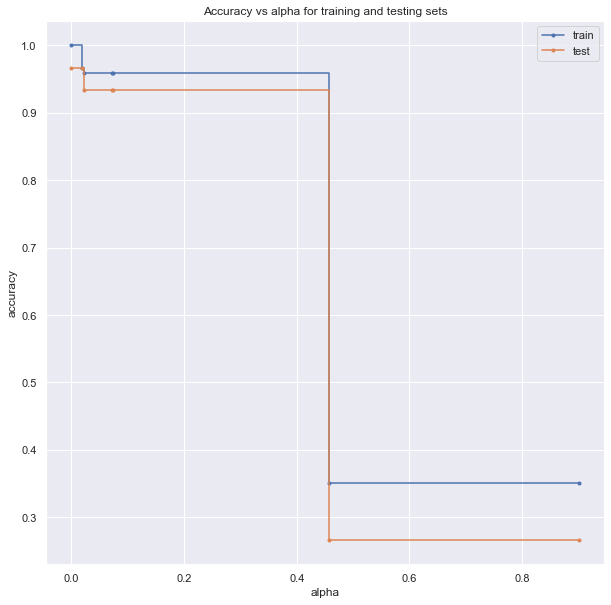

In [267]:
train_score = [IrisTree.score(X_train, Y_train) for IrisTree in IrisTrees]
test_score = [IrisTree.score(X_test, Y_test) for IrisTree in IrisTrees]

fig, ax = subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker='.', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker='.', label="test",
        drawstyle="steps-post")
ax.legend()
show()

In [268]:
IrisTree = DecisionTreeClassifier(random_state=868, ccp_alpha=0.019)
IrisTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.019, random_state=868)

In [269]:
IrisTree.score(X_train,Y_train)

0.9666666666666667

In [270]:
IrisTree.score(X_test,Y_test)

0.9666666666666667

In [271]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IrisTree.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                          12                           0   
Iris-versicolore                      0                           7   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         1  
Iris-virginica                          10

In [272]:
print(classification_report(Y_test,IrisTree.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [274]:
# For loop to check ideal sample that will give generalized model
#Test1
from sklearn.tree import DecisionTreeClassifier

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    IRISTree=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.019)
    
    IRISTree.fit(X_train,Y_train)
    
    train_score=IRISTree.score(X_train,Y_train)
    
    test_score=IRISTree.score(X_test,Y_test)
    
    if test_score >= train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 1.0 Train: 1.0 RandomState: 9
Test: 1.0 Train: 1.0 RandomState: 19
Test: 1.0 Train: 1.0 RandomState: 35
Test: 1.0 Train: 1.0 RandomState: 42
Test: 1.0 Train: 1.0 RandomState: 57
Test: 1.0 Train: 1.0 RandomState: 70
Test: 1.0 Train: 1.0 RandomState: 72
Test: 1.0 Train: 1.0 RandomState: 75
Test: 1.0 Train: 1.0 RandomState: 81
Test: 1.0 Train: 1.0 RandomState: 84
Test: 1.0 Train: 1.0 RandomState: 91
Test: 1.0 Train: 1.0 RandomState: 103
Test: 1.0 Train: 1.0 RandomState: 104
Test: 1.0 Train: 1.0 RandomState: 106
Test: 1.0 Train: 1.0 RandomState: 107
Test: 1.0 Train: 1.0 RandomState: 120
Test: 1.0 Train: 1.0 RandomState: 126
Test: 1.0 Train: 1.0 RandomState: 135
Test: 1.0 Train: 1.0 RandomState: 149
Test: 1.0 Train: 1.0 RandomState: 152
Test: 1.0 Train: 1.0 RandomState: 156
Test: 1.0 Train: 1.0 RandomState: 165
Test: 1.0 Train: 1.0 RandomState: 168
Test: 1.0 Train: 1.0 RandomState: 197
Test: 1.0 Train: 1.0 RandomState: 210
Test: 1.0 Train: 1.0 RandomState: 219
Test: 1.0 Train: 1.0 Ran

In [275]:
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=895)
IRISTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy')

In [276]:
IRISTree.score(X_train,Y_train)

1.0

In [277]:
IRISTree.score(X_test,Y_test)

1.0

In [280]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISTree.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                          11                           0   
Iris-versicolore                      0                          11   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                           8

In [281]:
print(classification_report(Y_test,IRISTree.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Random Forest

In [285]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    IRISTree=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.019)
    IRISForest = BaggingClassifier(IRISTree, n_estimators=200, max_samples=0.8,
                        random_state=868)
    IRISForest.fit(X_train,Y_train)
    
    train_score=IRISForest.score(X_train,Y_train)
    
    test_score=IRISForest.score(X_test,Y_test)
    
    if test_score >= train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 1.0 Train: 1.0 RandomState: 3
Test: 1.0 Train: 1.0 RandomState: 9
Test: 1.0 Train: 1.0 RandomState: 10
Test: 1.0 Train: 1.0 RandomState: 19
Test: 1.0 Train: 1.0 RandomState: 24
Test: 1.0 Train: 1.0 RandomState: 35
Test: 1.0 Train: 1.0 RandomState: 38
Test: 1.0 Train: 1.0 RandomState: 40
Test: 1.0 Train: 1.0 RandomState: 42
Test: 1.0 Train: 1.0 RandomState: 57
Test: 1.0 Train: 0.9916666666666667 RandomState: 70
Test: 1.0 Train: 1.0 RandomState: 72
Test: 1.0 Train: 1.0 RandomState: 74
Test: 1.0 Train: 1.0 RandomState: 75
Test: 1.0 Train: 1.0 RandomState: 81
Test: 1.0 Train: 1.0 RandomState: 84
Test: 1.0 Train: 1.0 RandomState: 91
Test: 1.0 Train: 1.0 RandomState: 93
Test: 1.0 Train: 1.0 RandomState: 103
Test: 1.0 Train: 1.0 RandomState: 104
Test: 1.0 Train: 1.0 RandomState: 106
Test: 1.0 Train: 1.0 RandomState: 107
Test: 1.0 Train: 1.0 RandomState: 112
Test: 1.0 Train: 1.0 RandomState: 120
Test: 1.0 Train: 1.0 RandomState: 126
Test: 1.0 Train: 1.0 RandomState: 131
Test: 1.0 Train: 

In [286]:
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=869)
IRISForest.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.019,
                                                        criterion='entropy'),
                  max_samples=0.8, n_estimators=200, random_state=868)

In [287]:
IRISForest.score(X_train,Y_train)

1.0

In [288]:
IRISForest.score(X_test,Y_test)

1.0

In [289]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISForest.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           9                           0   
Iris-versicolore                      0                          11   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                          10

In [290]:
print(classification_report(Y_test,IRISForest.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [291]:
# Visualizing Random State of Each Tree
IRISForest.estimators_, len(IRISForest.estimators_)

([DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=1733368850),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=1145595089),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=309667550),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=2044654508),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=276453394),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=1007785696),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=228873870),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         random_state=1318179602),
  DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         ran

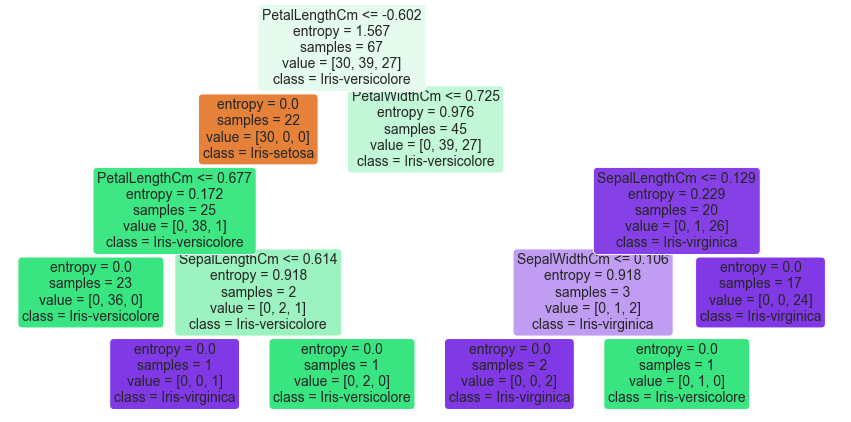

In [292]:
# Visualizing the 4th Tree of the Random Forest
figure(figsize=(15,7.5))
tree.plot_tree(IRISForest.estimators_[3],
          filled=True,
          rounded=True,
          class_names=["Iris-setosa","Iris-versicolore","Iris-virginica"],
          feature_names=Features.columns);

In [293]:
# Visualizing Random Forest Diagram
for i in range(len(IRISForest.estimators_)):
      print(tree.export_text(IRISForest.estimators_[i]))

|--- feature_3 <= -0.52
|   |--- class: 0
|--- feature_3 >  -0.52
|   |--- feature_3 <= 0.72
|   |   |--- feature_0 <= -1.08
|   |   |   |--- class: 2
|   |   |--- feature_0 >  -1.08
|   |   |   |--- feature_0 <= 1.52
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.52
|   |   |   |   |--- class: 2
|   |--- feature_3 >  0.72
|   |   |--- class: 2

|--- feature_2 <= -0.66
|   |--- class: 0
|--- feature_2 >  -0.66
|   |--- feature_3 <= 0.72
|   |   |--- feature_2 <= 0.73
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.73
|   |   |   |--- feature_3 <= 0.46
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.46
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.72
|   |   |--- class: 2

|--- feature_2 <= -0.74
|   |--- class: 0
|--- feature_2 >  -0.74
|   |--- feature_2 <= 0.56
|   |   |--- class: 1
|   |--- feature_2 >  0.56
|   |   |--- feature_3 <= 0.46
|   |   |   |--- feature_2 <= 0.71
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.71
|  

# ADA-Boost Forest/Stumps Forest Classifier Hyperparametre Tuning

In [295]:
## setting param for param_grid in GridSearchCV.
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [50, 100, 150, 200, 250, 300, 350, 400]
LearningRate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
Algorithm = ["SAMME","SAMME.R"]
Param = {"n_estimators":n_estimators,"learning_rate":LearningRate,"algorithm":Algorithm}
cv = StratifiedShuffleSplit(n_splits = 5, test_size=0.20, random_state=868)


## Calling on GridSearchCV object. 
IRISAdaB = GridSearchCV(estimator=AdaBoostClassifier(), 
                           param_grid = Param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv)
## Fitting the model
IRISAdaB.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=868, test_size=0.2,
            train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]},
             scoring='accuracy')

In [296]:
print(IRISAdaB.best_score_)
print(IRISAdaB.best_params_)
print(IRISAdaB.best_estimator_)

0.9416666666666668
{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1)


In [298]:
## setting param for param_grid in GridSearchCV.
from sklearn.ensemble import AdaBoostClassifier
LearningRate=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10]
Algorithm = ["SAMME","SAMME.R"]
Param = {"learning_rate":LearningRate,"algorithm":Algorithm}
cv = StratifiedShuffleSplit(n_splits = 5, test_size=0.20, random_state=868)


## Calling on GridSearchCV object. 
IRISAdaB = GridSearchCV(estimator=AdaBoostClassifier(), 
                           param_grid = Param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv)
## Fitting the model
IRISAdaB.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=868, test_size=0.2,
            train_size=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1]},
             scoring='accuracy')

In [299]:
print(IRISAdaB.best_score_)
print(IRISAdaB.best_params_)
print(IRISAdaB.best_estimator_)

0.9416666666666668
{'algorithm': 'SAMME', 'learning_rate': 0.03}
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.03)


In [300]:
# For loop to check ideal sample that will give generalized model
#Test1
from sklearn.ensemble import AdaBoostClassifier
# Learning rate shrinks the contribution of each classifier by learning_rate.
# There is a trade-off between learning_rate and n_estimators.
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    IRISAdaB=AdaBoostClassifier(n_estimators=50, learning_rate=0.03, algorithm='SAMME')
    
    IRISAdaB.fit(X_train,Y_train)
    
    train_score=IRISAdaB.score(X_train,Y_train)
    
    test_score=IRISAdaB.score(X_test,Y_test)
    
    if test_score > train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 1
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 3
Test: 0.9666666666666667 Train: 0.95 RandomState: 4
Test: 1.0 Train: 0.95 RandomState: 9
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 10
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 14
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 15
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 17
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 18
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 19
Test: 1.0 Train: 0.9416666666666667 RandomState: 24
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 26
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 32
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 35
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 36
Test: 0.9666666666666667 Train: 0.9583333333333334 Random

Test: 0.9666666666666667 Train: 0.95 RandomState: 378
Test: 0.9666666666666667 Train: 0.9416666666666667 RandomState: 381
Test: 0.9666666666666667 Train: 0.95 RandomState: 382
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 383
Test: 0.9666666666666667 Train: 0.95 RandomState: 389
Test: 1.0 Train: 0.9666666666666667 RandomState: 390
Test: 1.0 Train: 0.95 RandomState: 391
Test: 0.9666666666666667 Train: 0.9416666666666667 RandomState: 394
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 396
Test: 1.0 Train: 0.95 RandomState: 398
Test: 0.9666666666666667 Train: 0.9416666666666667 RandomState: 400
Test: 1.0 Train: 0.9666666666666667 RandomState: 401
Test: 0.9666666666666667 Train: 0.95 RandomState: 403
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 405
Test: 1.0 Train: 0.95 RandomState: 410
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 411
Test: 1.0 Train: 0.9666666666666667 RandomState: 415
Test: 0.9666666666666667 Train: 

Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 709
Test: 1.0 Train: 0.95 RandomState: 710
Test: 1.0 Train: 0.95 RandomState: 711
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 712
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 725
Test: 0.9666666666666667 Train: 0.95 RandomState: 727
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 729
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 731
Test: 0.9666666666666667 Train: 0.95 RandomState: 732
Test: 1.0 Train: 0.95 RandomState: 736
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 737
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 741
Test: 1.0 Train: 0.95 RandomState: 742
Test: 0.9666666666666667 Train: 0.95 RandomState: 743
Test: 0.9666666666666667 Train: 0.9583333333333334 RandomState: 747
Test: 1.0 Train: 0.95 RandomState: 749
Test: 1.0 Train: 0.95 RandomState: 750
Test: 1.0 Train: 0.95 RandomState: 751
Test: 0.9666666666666

In [301]:
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=40)
IRISAdaB.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.03)

In [302]:
IRISAdaB.score(X_train,Y_train)

0.9666666666666667

In [303]:
IRISAdaB.score(X_test,Y_test)

1.0

In [304]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISAdaB.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                           8                           0   
Iris-versicolore                      0                          12   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                          10

In [305]:
print(classification_report(Y_test,IRISAdaB.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# GradientBoostingClassifier

In [307]:
# Tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .20, random_state=562)
## setting param for param_grid in GridSearchCV.
Max_Depth = [3,4,5,6,7,8,9,10,11]
Trees = [100,150,200,250,300,350,400]
LearningRate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param = {'n_estimators':Trees,'max_depth':Max_Depth,'learning_rate':LearningRate}
IRISGBC = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = param, scoring = 'accuracy', n_jobs =-1, cv=cv)
## Fitting the model
IRISGBC.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=562, test_size=0.2,
            train_size=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             scoring='accuracy')

In [308]:
print(IRISGBC.best_score_)
print(IRISGBC.best_params_)
print(IRISGBC.best_estimator_)

0.95
{'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 400}
GradientBoostingClassifier(learning_rate=1.0, n_estimators=400)


In [309]:
# Tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .20, random_state=562)
## setting param for param_grid in GridSearchCV.
Max_Depth = [3,4,5,6,7,8,9,10,11]
Trees = [100,150,200,250,300,350,400]
LearningRate = [0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0]
param = {'n_estimators':Trees,'max_depth':Max_Depth,'learning_rate':LearningRate}
IRISGBC = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = param, scoring = 'accuracy', n_jobs =-1, cv=cv)
## Fitting the model
IRISGBC.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=562, test_size=0.2,
            train_size=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.9, 0.91, 0.92, 0.93, 0.94, 0.95,
                                           0.96, 0.97, 0.98, 0.99, 1.0],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]},
             scoring='accuracy')

In [310]:
print(IRISGBC.best_score_)
print(IRISGBC.best_params_)
print(IRISGBC.best_estimator_)

0.95
{'learning_rate': 0.9, 'max_depth': 3, 'n_estimators': 250}
GradientBoostingClassifier(learning_rate=0.9, n_estimators=250)


In [316]:
# For loop to check ideal sample that will give generalized model
#Test1
from sklearn.ensemble import GradientBoostingClassifier
# Learning rate shrinks the contribution of each classifier by learning_rate.
# There is a trade-off between learning_rate and n_estimators.
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=i)
    
    IRISGradB1=GradientBoostingClassifier(n_estimators=250, learning_rate=0.9, max_depth=3)
    
    IRISGradB1.fit(X_train,Y_train)
    
    train_score=IRISGradB1.score(X_train,Y_train)
    
    test_score=IRISGradB1.score(X_test,Y_test)
    
    if test_score >= train_score:
        print("Test: {} Train: {} RandomState: {}".format(test_score,train_score,i))

Test: 1.0 Train: 1.0 RandomState: 3
Test: 1.0 Train: 1.0 RandomState: 9
Test: 1.0 Train: 1.0 RandomState: 10
Test: 1.0 Train: 1.0 RandomState: 19
Test: 1.0 Train: 1.0 RandomState: 24
Test: 1.0 Train: 1.0 RandomState: 35
Test: 1.0 Train: 1.0 RandomState: 38
Test: 1.0 Train: 1.0 RandomState: 40
Test: 1.0 Train: 1.0 RandomState: 42
Test: 1.0 Train: 1.0 RandomState: 43
Test: 1.0 Train: 1.0 RandomState: 68
Test: 1.0 Train: 1.0 RandomState: 70
Test: 1.0 Train: 1.0 RandomState: 72
Test: 1.0 Train: 1.0 RandomState: 74
Test: 1.0 Train: 1.0 RandomState: 84
Test: 1.0 Train: 1.0 RandomState: 93
Test: 1.0 Train: 1.0 RandomState: 103
Test: 1.0 Train: 1.0 RandomState: 106
Test: 1.0 Train: 1.0 RandomState: 107
Test: 1.0 Train: 1.0 RandomState: 112
Test: 1.0 Train: 1.0 RandomState: 126
Test: 1.0 Train: 1.0 RandomState: 131
Test: 1.0 Train: 1.0 RandomState: 152
Test: 1.0 Train: 1.0 RandomState: 155
Test: 1.0 Train: 1.0 RandomState: 156
Test: 1.0 Train: 1.0 RandomState: 168
Test: 1.0 Train: 1.0 RandomSta

In [323]:
X_train,X_test,Y_train,Y_test = train_test_split(Features, Label, test_size=0.20, random_state=103)
IRISGradB1=GradientBoostingClassifier(n_estimators=250, learning_rate=0.9, max_depth=3)
IRISGradB1.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.9, n_estimators=250)

In [324]:
IRISGradB1.score(X_train,Y_train)

1.0

In [325]:
IRISGradB1.score(X_test,Y_test)

1.0

In [326]:
# printing confision matrix
DataFrame(confusion_matrix(Y_test,IRISGradB1.predict(X_test)),\
            columns=["Predicted Iris-setosa", "Predicted Iris-versicolore", "Predicted Iris-virginica"],\
            index=["Iris-setosa","Iris-versicolore","Iris-virginica"] )

Predicted Iris-setosa  Predicted Iris-versicolore  \
Iris-setosa                          10                           0   
Iris-versicolore                      0                           7   
Iris-virginica                        0                           0   

                  Predicted Iris-virginica  
Iris-setosa                              0  
Iris-versicolore                         0  
Iris-virginica                          13

In [327]:
print(classification_report(Y_test,IRISGradB1.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

